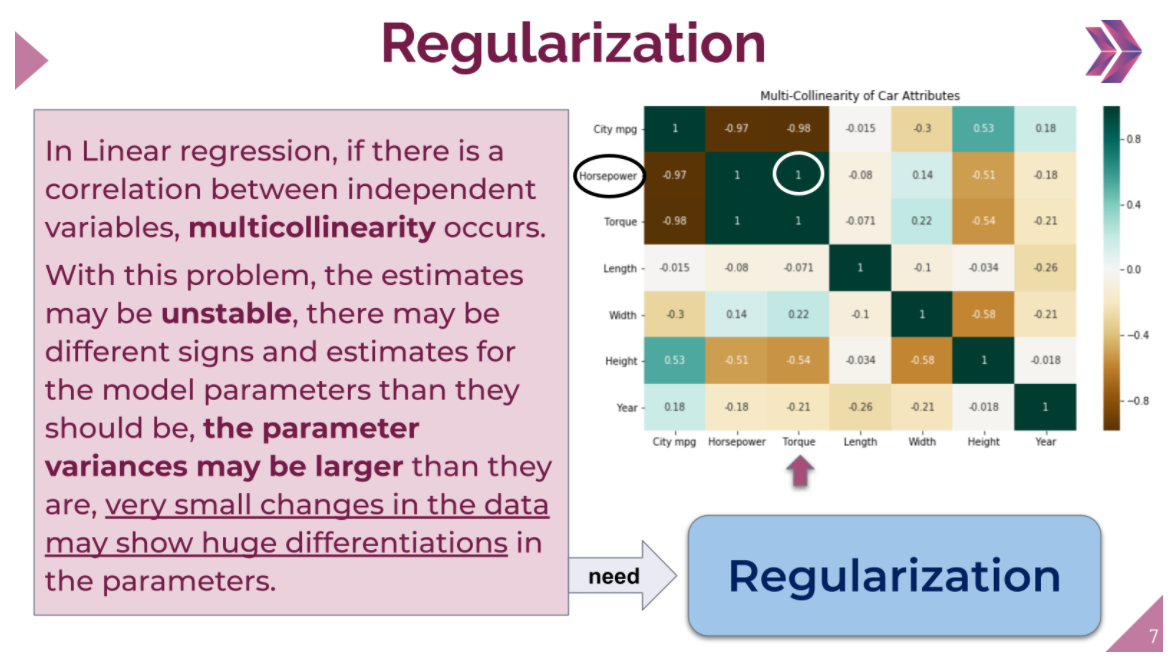

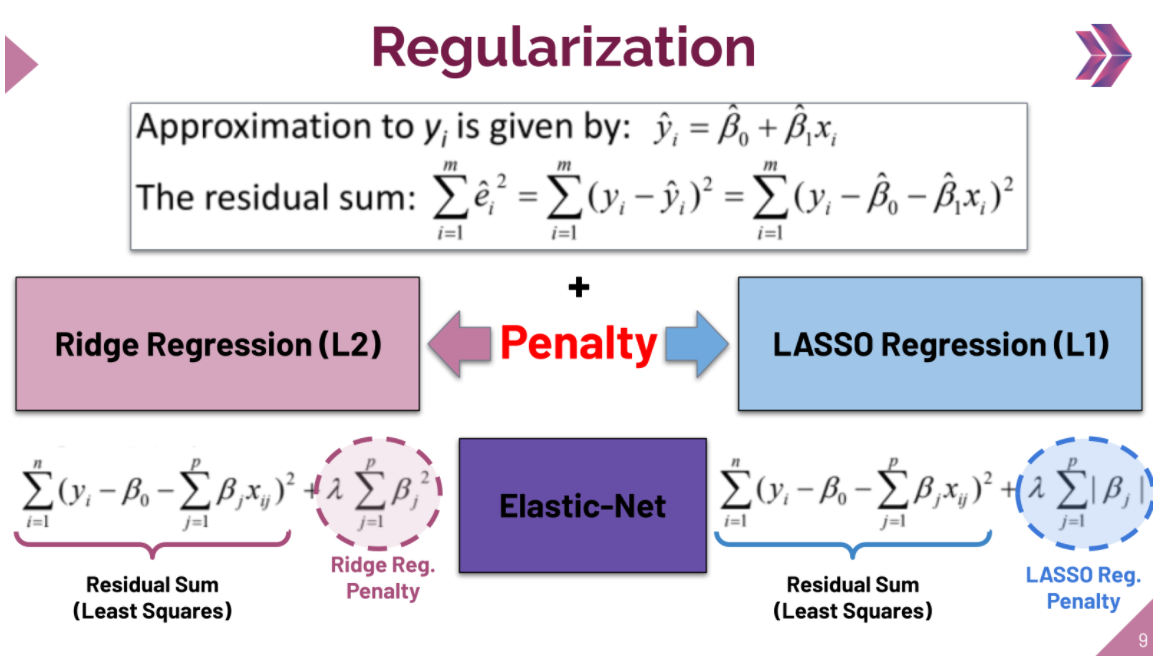

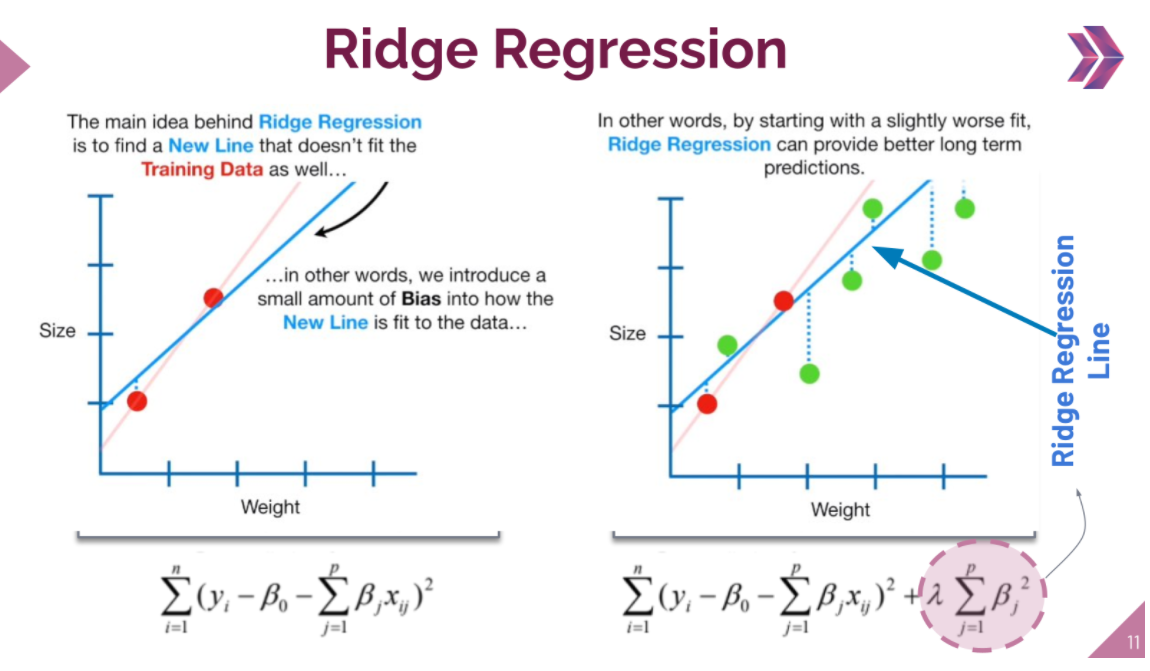

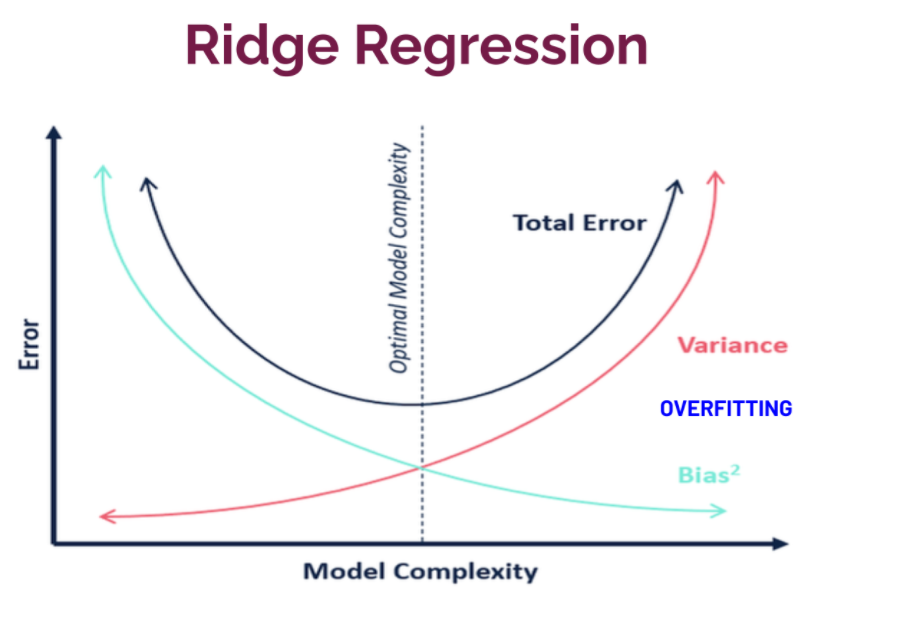

yukardaki gösterimden de anlaşılacağı üzere lambda panaly'si ile modelime bias eklemiş oldum.

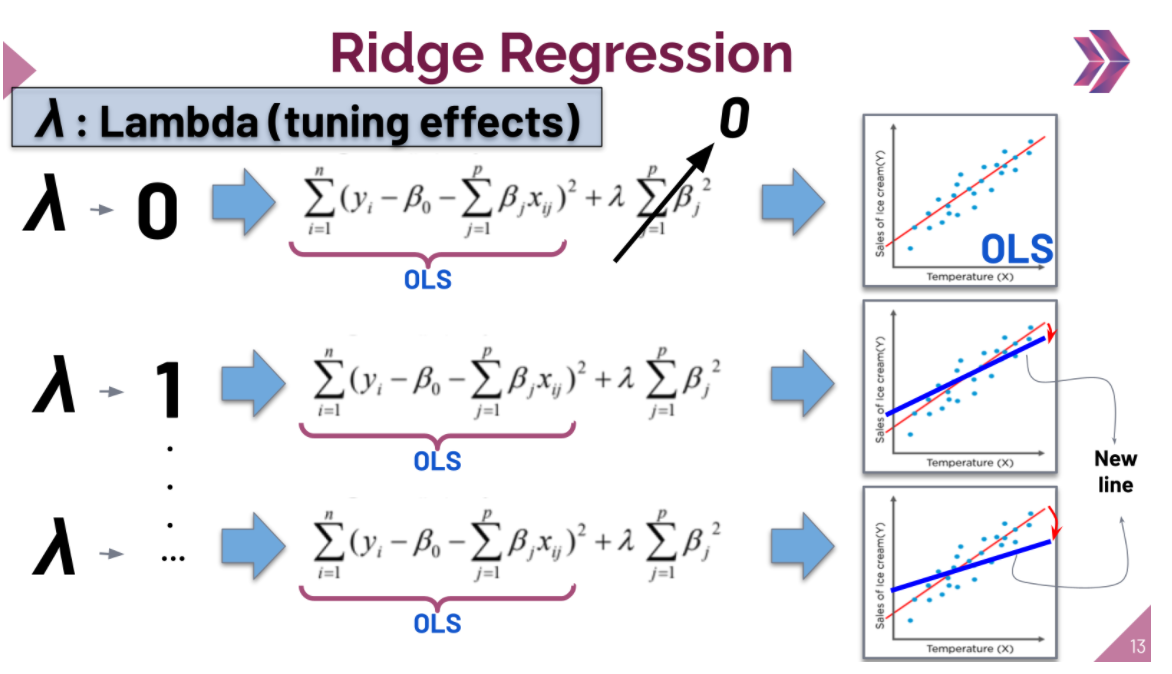

lambda 0 olduğunda klasik OLS oluyor.lambdayı belli bir derecede uygulamam lazım. çok fazla kaçırmamam lazım. bunu nasıl yapıyorum? bir iterasyon ile. Bakın aşağıda lambdaya iterasyon yöntemi ile farklı değerler atadığımda bir noktada en iyi lambda değerine ulaşıyorum. ve bu lambdayı kullanmak üzere seçiyorum.

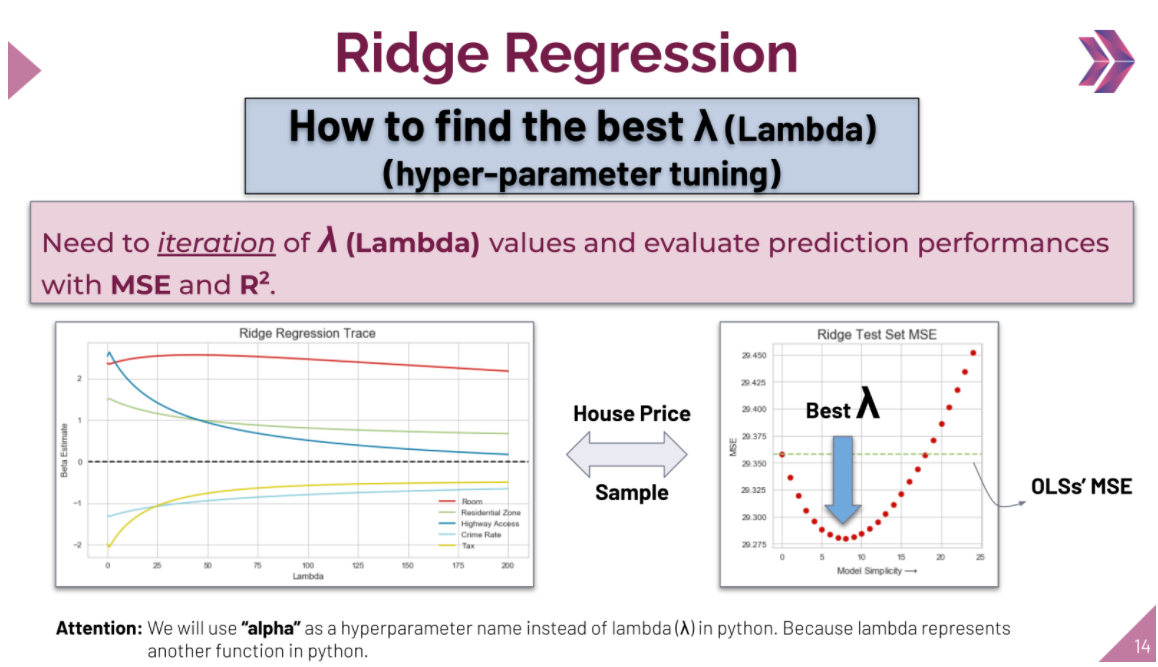

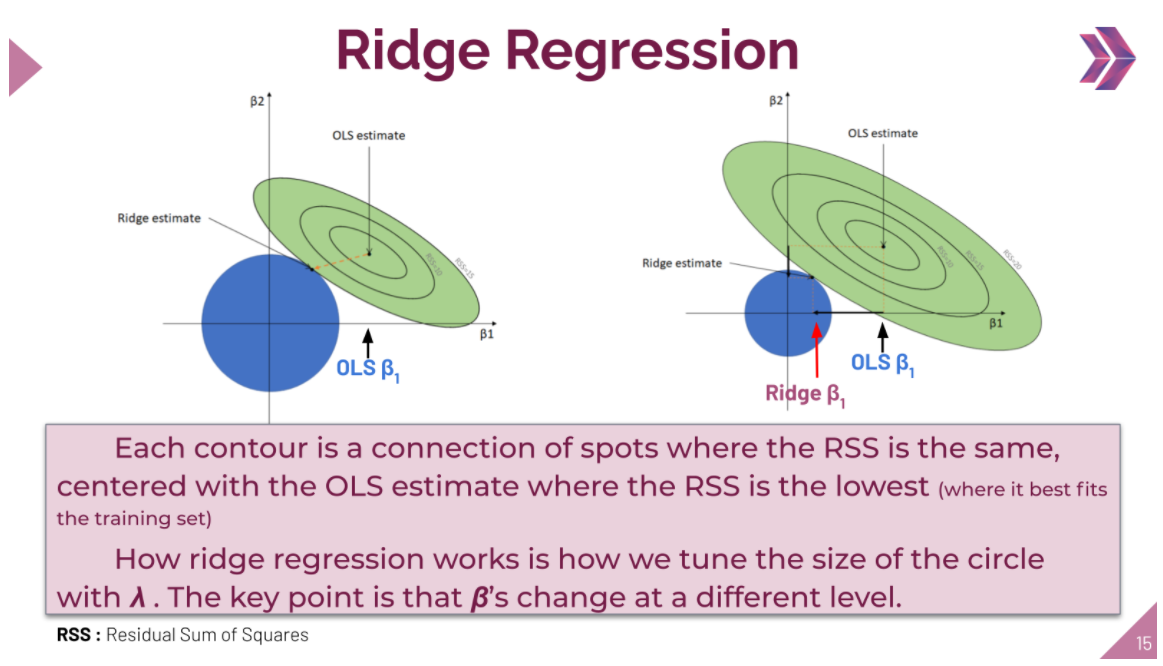

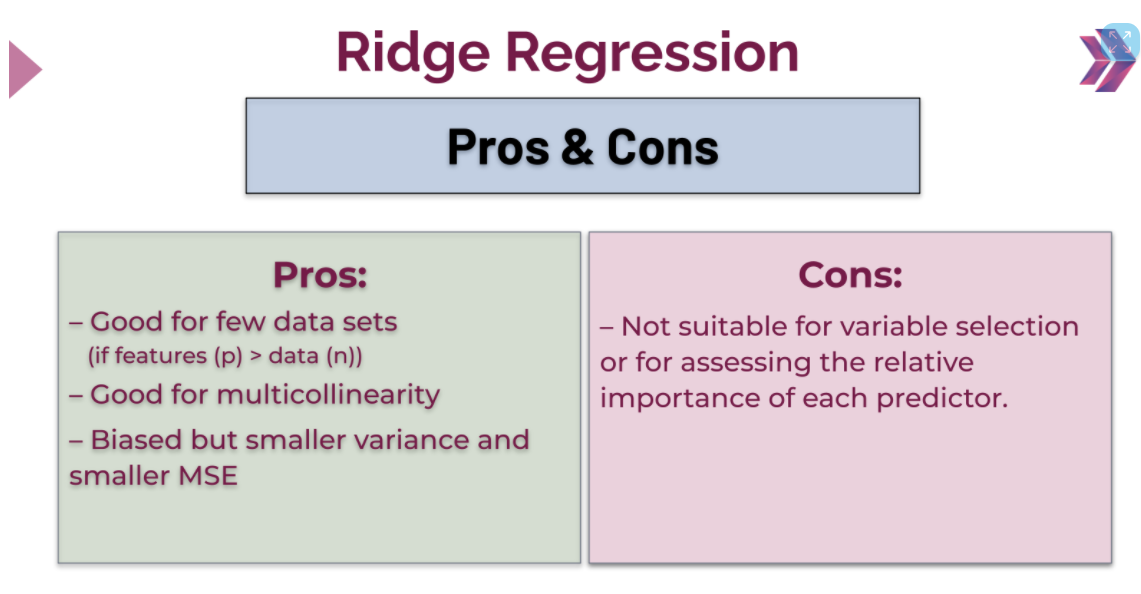

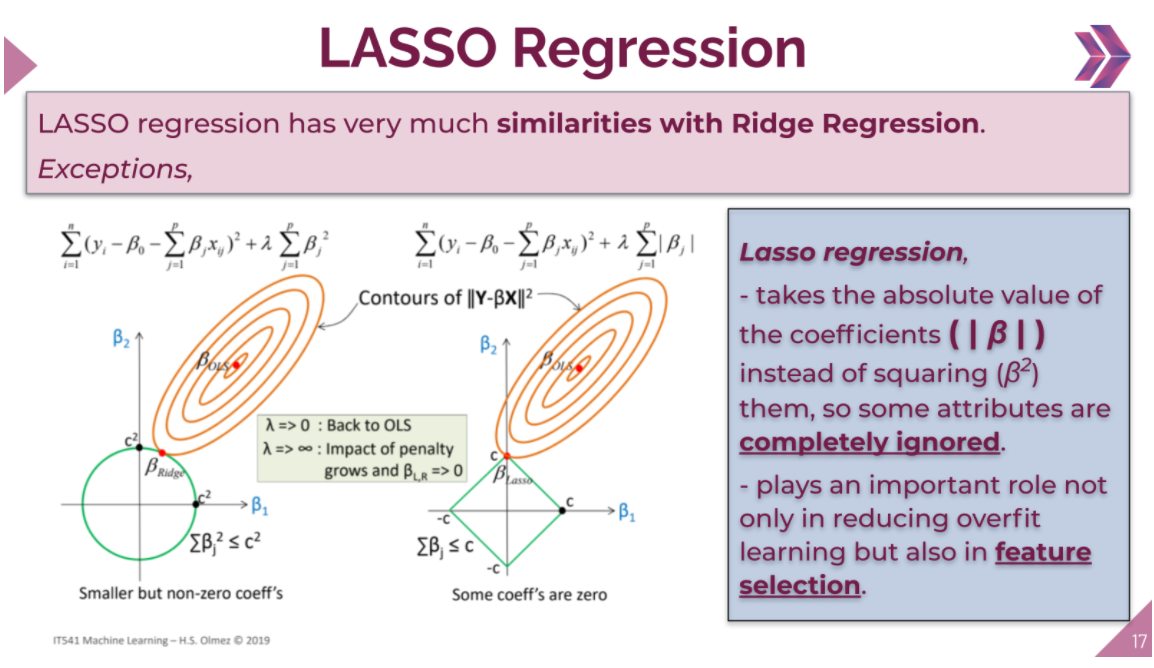

B1'i denklemden çıkartmış gibi oluyoruz. LASSO diyor ki bu ikisi iş yapmıyor bunları çıkart, sadece şununla devam et. Ridge ise hepsinden faydalanmak istiyor. LASSO da multicollinearity varsa onları oyundan çıkartıyor.

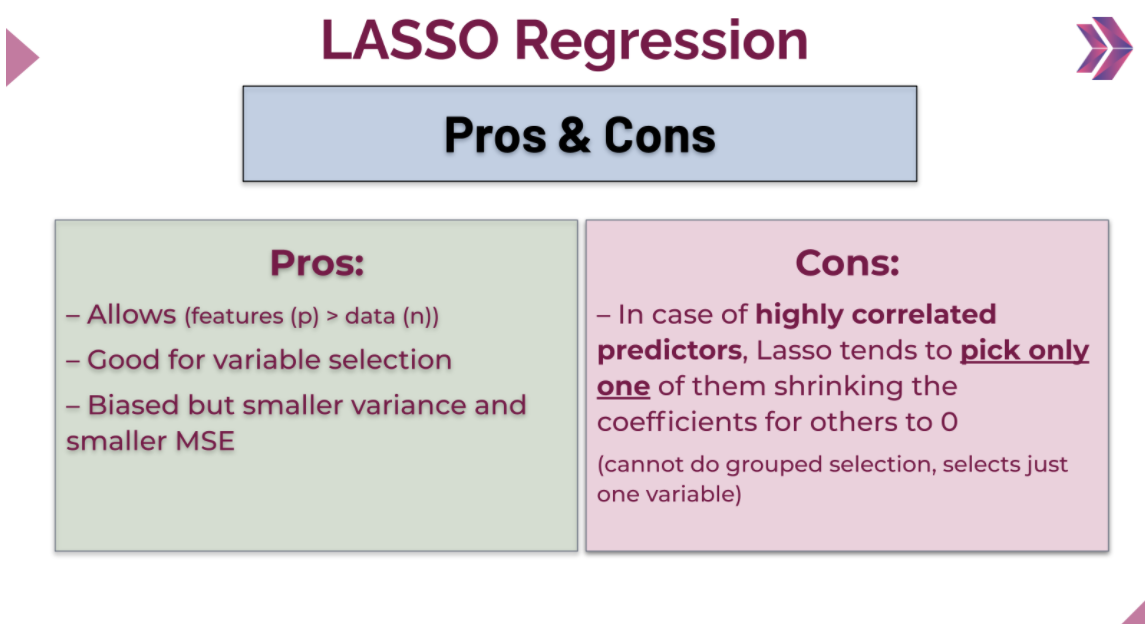

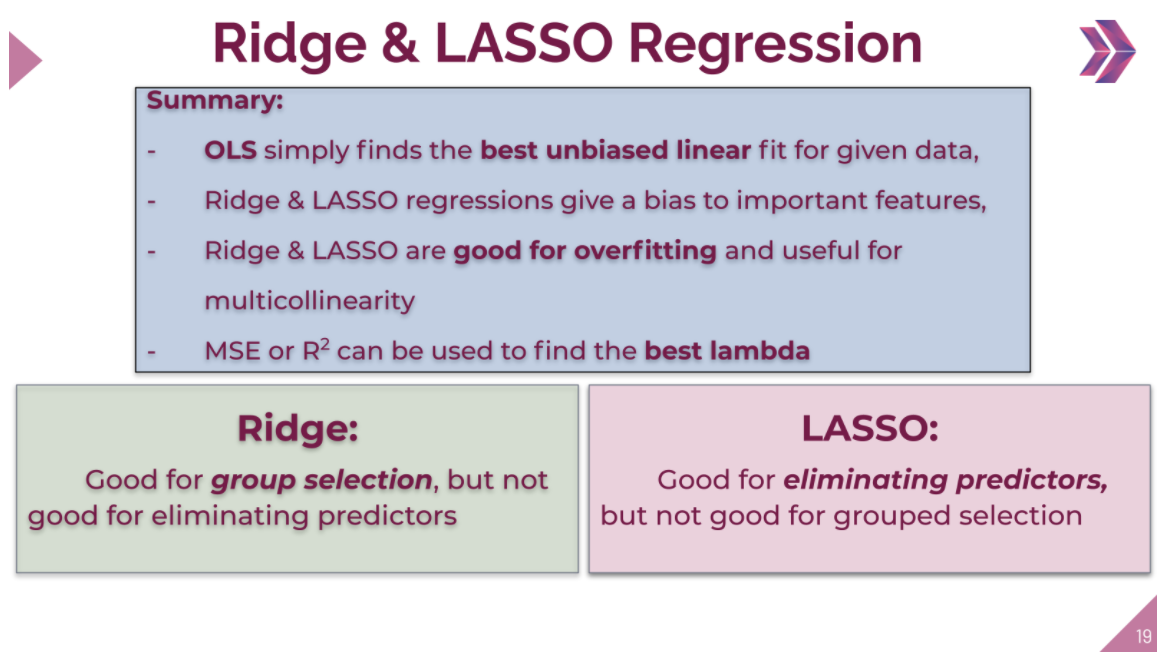

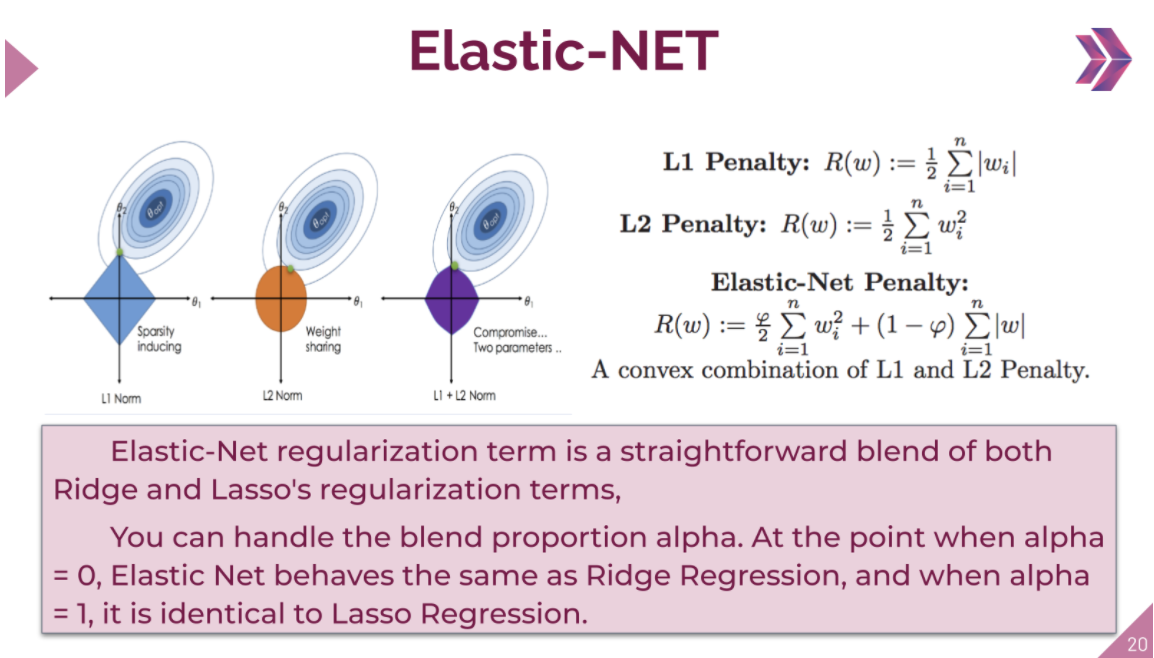

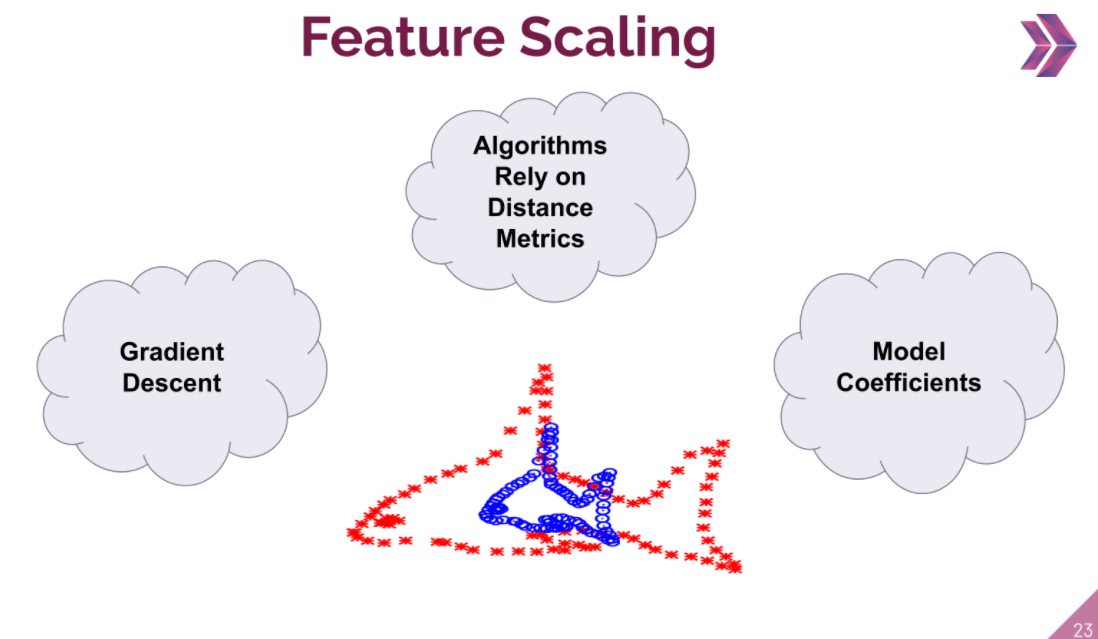

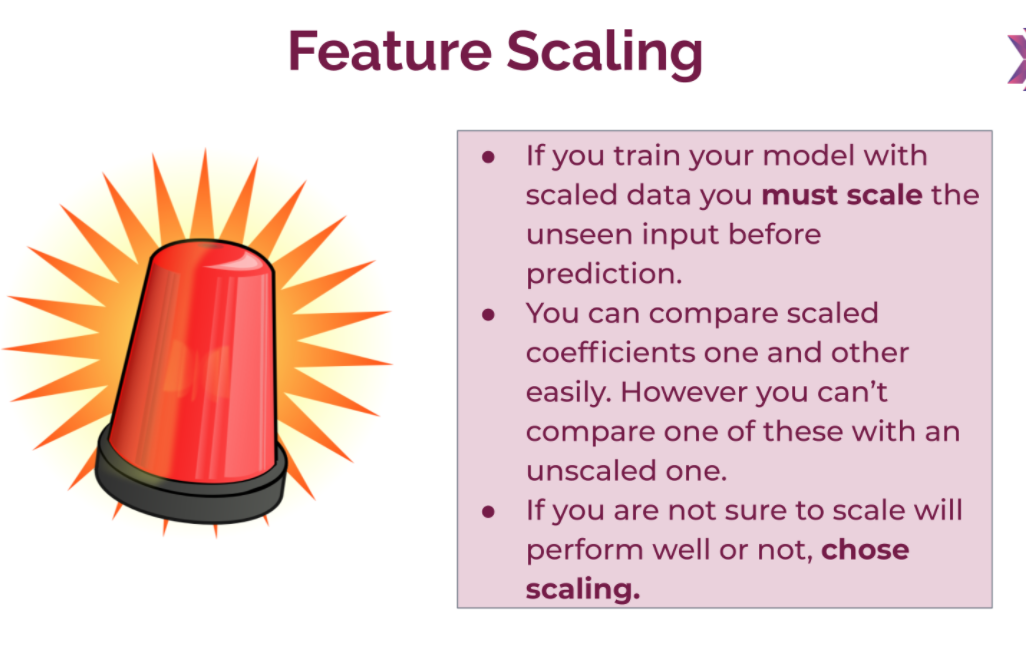

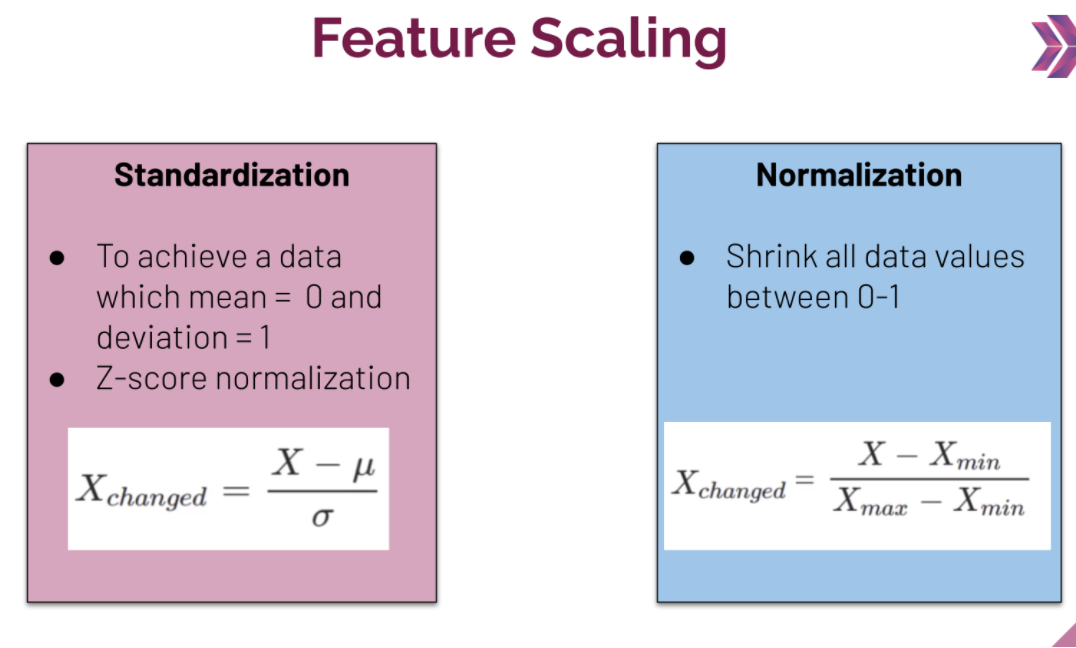

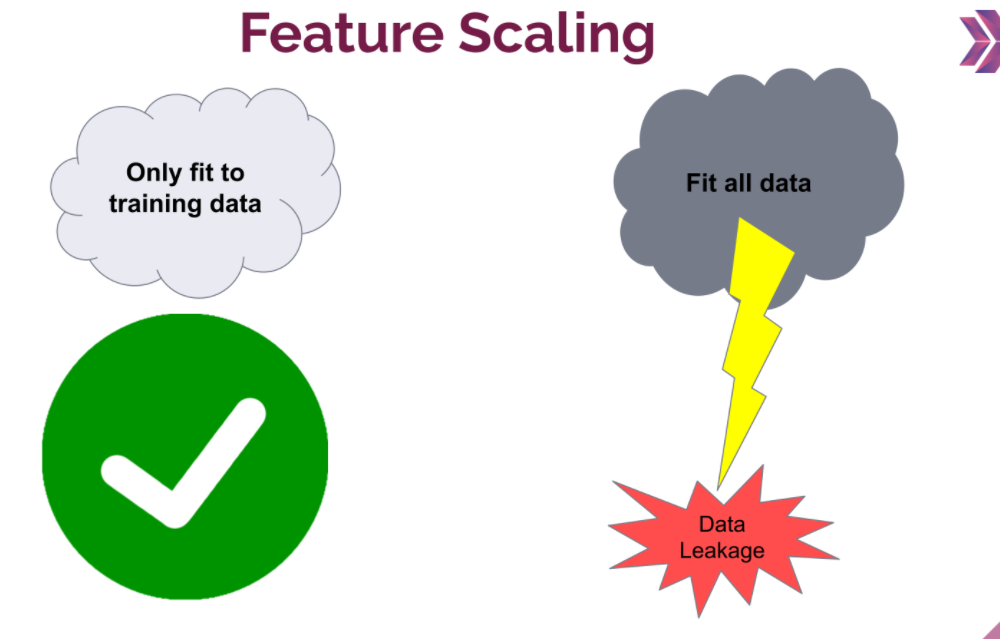

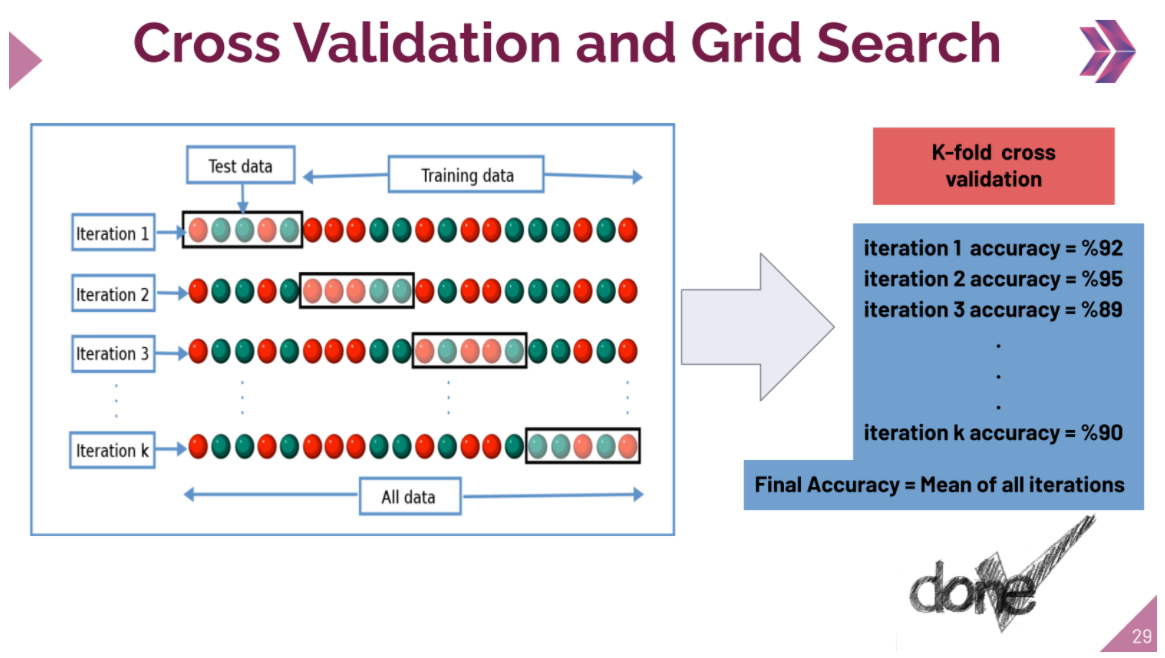

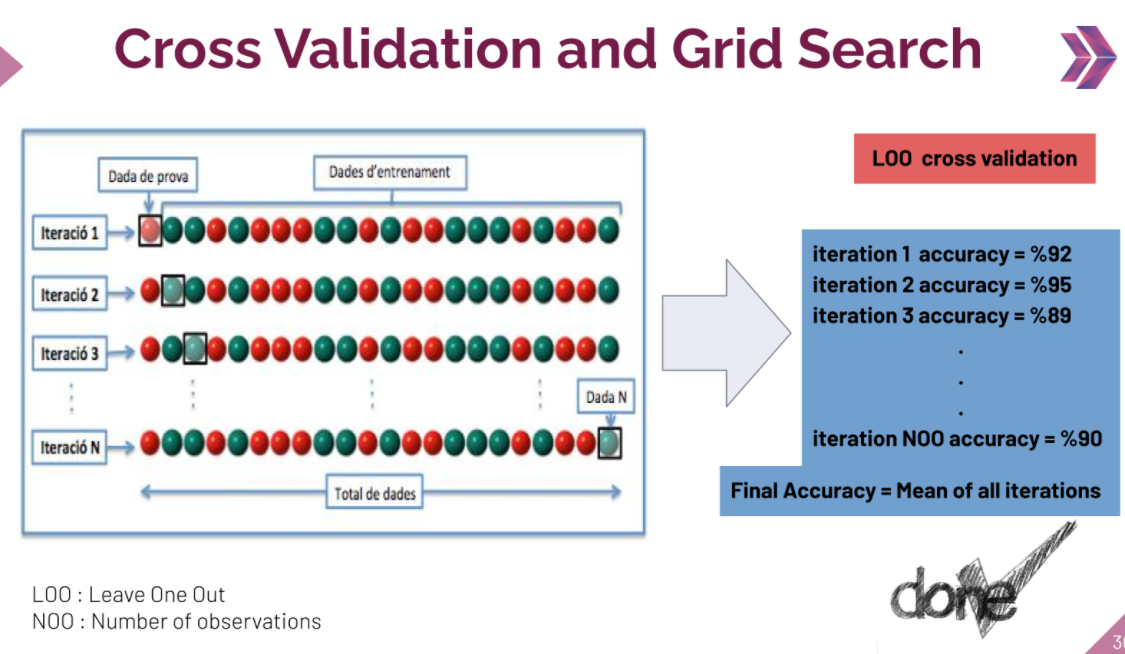

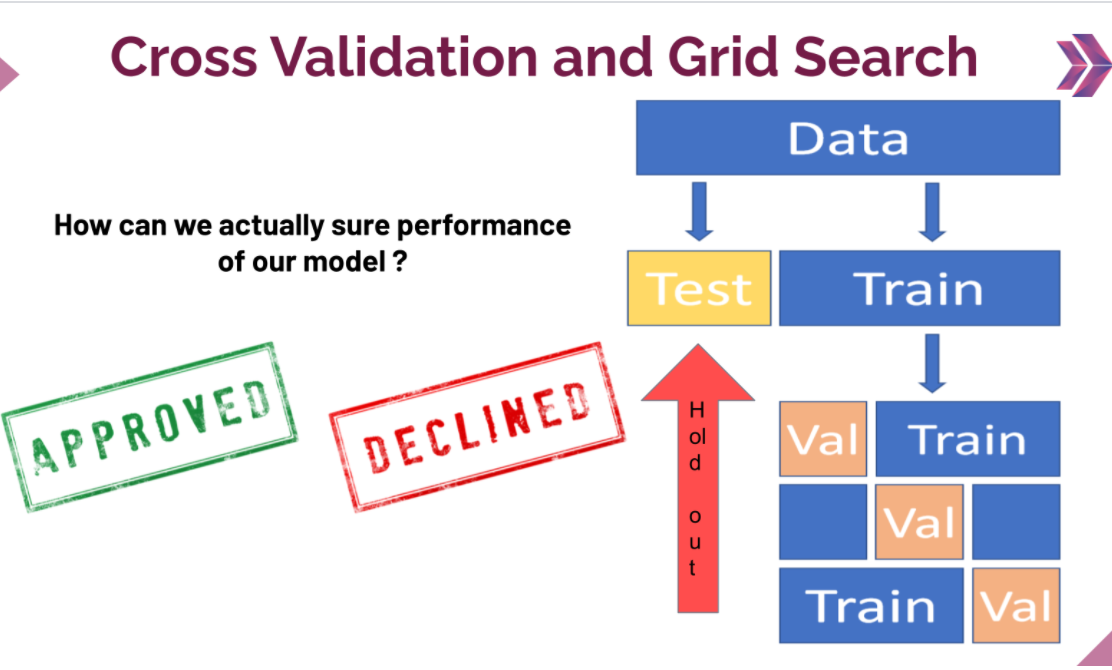

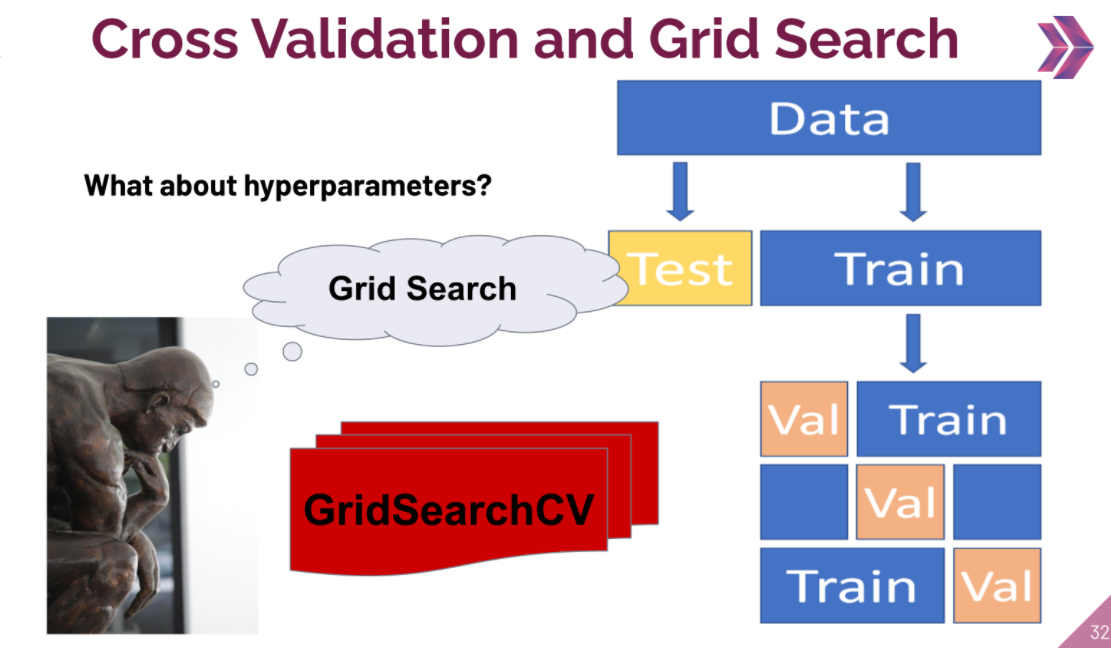

# Regularization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [4]:
X = df.drop("sales", axis =1)
y = df["sales"]

### Polynomial Conversion

In [5]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_converter = PolynomialFeatures(degree=5, include_bias=False)  # sentetik future ları elde etmek için polynomial kullanıyoruz

poly_features = polynomial_converter.fit_transform(X)

### Train | Test Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)  

# omurilikten yazdığımız kodlardan birisi :))

# 

## Scaling the Data

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()

In [9]:
scaler.fit(X_train) 

# sızıntı olmasını engellemek için tüm dataya uygulamıyorum (test datasını kesinlikle eklemiyorum) 
# Datamdaki her bir feature ın ortalama ve std sapma bilgilerimi aldı ve atadı. Sadece train ile yapılır, çünkü leakage olmaması gereklidir.

# datamdaki mean ve std bilgilerini alıyor ve scaler içinde bunları kullanıyor.

StandardScaler()

In [10]:
X_train = scaler.transform(X_train)

# bu bana z score ları veriyor. o yüzden buna z-score scaling de deniyor.
# Bu değerler standart dağılımda z score olarak nereye tekabul ettiğini gösterir. 
# Meanler 0 , sdandart deviationlaron 1 e denk geldiği z score lar.

In [11]:
X_train

array([[ 0.49300171, -0.33994238,  1.61586707, ...,  0.00704484,
         0.36731969,  0.73567879],
       [ 1.61337153,  1.32852213,  1.90079242, ...,  2.67449856,
         2.0763226 ,  1.3268794 ],
       [-0.84811893, -1.58789957, -1.02319564, ..., -0.42823202,
        -0.36509041, -0.32221291],
       ...,
       [ 1.04606563, -1.30982215,  0.27064572, ..., -0.42440306,
        -0.34885122, -0.26314509],
       [ 0.74817069,  0.03987068, -1.26608283, ..., -0.4280649 ,
        -0.36507729, -0.32226899],
       [ 0.13813882,  0.55533126,  1.01799092, ...,  0.24192258,
         0.16357974,  0.0357574 ]])

In [12]:
X_test = scaler.transform(X_test)

In [13]:
X_test

array([[-0.91339472,  1.76259419,  0.68168558, ...,  0.62770088,
         0.09523693, -0.14999627],
       [ 1.23121149,  0.23655959, -1.19601922, ..., -0.42768623,
        -0.36503783, -0.32226552],
       [-0.46002473, -0.40776614,  0.35005115, ..., -0.34929255,
        -0.2825677 , -0.24821148],
       ...,
       [-1.33115973,  1.19965698, -1.18200649, ..., -0.42673785,
        -0.36499105, -0.3222642 ],
       [ 1.3522684 , -0.23142436, -1.4389064 , ..., -0.42823197,
        -0.36509041, -0.32226987],
       [ 0.27818504, -0.06186496,  0.01841672, ..., -0.35649712,
        -0.31776442, -0.29546644]])

In [14]:
pd.DataFrame(X_train).agg(["mean", "std"]).round()

0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
mean -0.0  0.0  0.0 -0.0  0.0 -0.0 -0.0  0.0  0.0 -0.0  0.0 -0.0 -0.0  0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

       14   15   16   17   18   19   20   21   22   23   24   25   26   27  \
mean  0.0  0.0 -0.0  0.0  0.0 -0.0  0.0 -0.0 -0.0 -0.0  0.0  0.0  0.0  0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

       28   29   30   31   32   33   34   35   36   37   38   39   40   41  \
mean -0.0  0.0 -0.0  0.0 -0.0 -0.0 -0.0  0.0  0.0  0.0 -0.0 -0.0 -0.0 -0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

       42   43   44   45   46   47   48   49   50   51   52   53   54  
mean -0.0  0.0  0.0 -0.0 -0.0  0.0  0.0  0.0 -0.0 -0.0  0.0 -0.0  0.0  
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [15]:
pd.DataFrame(X_test).agg(["mean", "std"]).round()

0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
mean -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

       14   15   16   17   18   19   20   21   22   23   24   25   26   27  \
mean -0.0 -0.0  0.0  0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0   

       28   29   30   31   32   33   34   35   36   37   38   39   40   41  \
mean -0.0  0.0  0.0  0.0  0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0   
std   1.0  1.0  1.0  1.0  1.0  2.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0   

       42   43   44   45   46   47   48   49   50   51   52   53   54  
mean -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  0.0  0.0  0.0  0.0  0.0  0.0  
std   1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0

## Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [17]:
lm.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = lm.predict(X_test)

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [20]:
y_train_pred = lm.predict(X_train)

In [21]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9976072485267145
MAE 		: 0.18621293136504957
MSE 		: 0.06296801889161928
RMSE 		: 0.25093429198022993


In [22]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.7649897681643356
MAE 		: 0.6659594307588336
MSE 		: 6.634847380750249
RMSE 		: 2.5758197492740535


In [23]:
lm_scores = {"lm_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lm_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ls =pd.DataFrame(lm_scores)
ls

lm_train   lm_test
rmse  0.250934  2.575820
mae   0.186213  0.665959
mse   0.062968  6.634847
R2    0.997607  0.764990

## Multicolineratiy

In [24]:
def color_red(val):
    
    if val > 0.90 and val < 0.99:
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'

# %90 ve üzeri bir multicorolasyon göstergesidir.

In [25]:
pd.DataFrame(poly_features).corr().style.applymap(color_red)

## Cross Validate

In [1]:
from sklearn.metrics import SCORERS
list(SCORERS.keys())

['explained_variance',
 'r2',
 'max_error',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'accuracy',
 'top_k_accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'adjusted_rand_score',
 'rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'jaccard',
 'jaccard_macro',
 'jaccard_m

In [ ]:
skoru en yukarlarda göstermek için başına bir - (negative) işareti koyuyoruz.

In [26]:
from sklearn.model_selection import cross_validate, cross_val_score

In [27]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)

# cross_val.. bunları ne yapıyor? kendi içinde bunları 10 parçaya bölüyor. 1 parçasını test, 9 parçasını train için ayırıyor. 
# ve test verilerini sırayla kaydırarak farklı farklı 9'arlı train grupları için validation yapıyor.

In [28]:
pd.DataFrame(scores, index = range(1, 11))

fit_time  score_time   test_r2  test_neg_mean_absolute_error  \
1   0.004994    0.002001 -0.280734                     -1.994430   
2   0.004000    0.002010  0.993019                     -0.377066   
3   0.003990    0.001006  0.983934                     -0.392312   
4   0.004006    0.001995  0.825272                     -0.979767   
5   0.014995    0.001996  0.991181                     -0.322253   
6   0.004001    0.001005  0.969012                     -0.484493   
7   0.002991    0.001004  0.992885                     -0.327955   
8   0.003999    0.001997  0.990130                     -0.447015   
9   0.005002    0.001002  0.965508                     -0.465024   
10  0.004997    0.002005  0.990123                     -0.324433   

    test_neg_mean_squared_error  test_neg_root_mean_squared_error  
1                    -31.328119                         -5.597153  
2                     -0.250648                         -0.500647  
3                     -0.306241                         -0.553391  
4                     -4.402358                         -2.098180  
5                     -0.166869                         -0.408496  
6                     -0.976815                         -0.988339  
7                     -0.144808                         -0.380536  
8                     -0.332058                         -0.576244  
9                     -0.528863                         -0.727230  
10                    -0.197801                         -0.444748

In [29]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                             0.842033
test_neg_mean_absolute_error       -0.611475
test_neg_mean_squared_error        -3.863458
test_neg_root_mean_squared_error   -1.227496
dtype: float64

In [30]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.7649897681643356
MAE 		: 0.6659594307588336
MSE 		: 6.634847380750249
RMSE 		: 2.5758197492740535


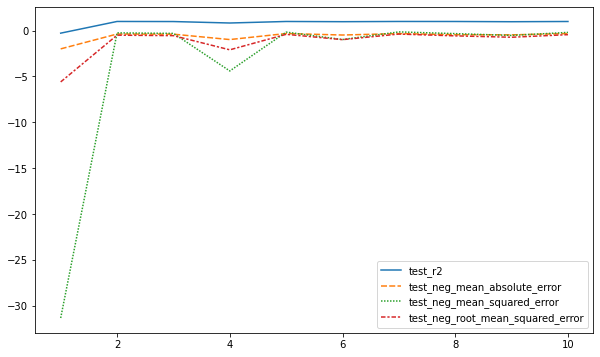

In [31]:
sns.lineplot(data = scores.iloc[:,2:]);

In [32]:
lm.coef_

array([  13.94208355,   -3.14784527,    0.62211693,  -58.34861425,
         17.22769511,   -3.87503073,   14.68801386,    0.83549441,
         -2.76582388,  115.5030865 ,  -28.6841704 ,   20.25759575,
         -7.33897897,  -19.84049142,    9.18338862,  -25.16298475,
        -16.85962816,   22.72378492,   -3.58116844, -103.95573376,
         28.8373088 ,  -35.71247488,   -3.67100676,   39.84916212,
        -15.89773511,    3.95679997,    5.3314373 ,    7.51623174,
        -14.30523704,   22.09544373,   23.11198084,  -12.0746903 ,
        -29.92034554,   22.77568382,   34.74282798,  -12.52775011,
         18.23102184,   11.0822807 ,  -24.33558184,   13.03946121,
        -11.73805841,    7.36908608,  -15.86507571,    8.17148819,
          8.93305381,  -10.07004967,    1.90458729,    7.06596667,
         -0.25747695,  -10.68987752,   -5.39010827,   -1.57858798,
         11.40089447,    6.35221543,  -13.45760268])

In [33]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

lm_coef
0    13.942084
1    -3.147845
2     0.622117
3   -58.348614
4    17.227695
5    -3.875031
6    14.688014
7     0.835494
8    -2.765824
9   115.503087
10  -28.684170
11   20.257596
12   -7.338979
13  -19.840491
14    9.183389
15  -25.162985
16  -16.859628
17   22.723785
18   -3.581168
19 -103.955734
20   28.837309
21  -35.712475
22   -3.671007
23   39.849162
24  -15.897735
25    3.956800
26    5.331437
27    7.516232
28  -14.305237
29   22.095444
30   23.111981
31  -12.074690
32  -29.920346
33   22.775684
34   34.742828
35  -12.527750
36   18.231022
37   11.082281
38  -24.335582
39   13.039461
40  -11.738058
41    7.369086
42  -15.865076
43    8.171488
44    8.933054
45  -10.070050
46    1.904587
47    7.065967
48   -0.257477
49  -10.689878
50   -5.390108
51   -1.578588
52   11.400894
53    6.352215
54  -13.457603

## Ridge Regression

In [34]:
from sklearn.linear_model import Ridge

In [35]:
ridge_model = Ridge(alpha=1)

In [36]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=1)

In [37]:
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9825113234815029
MAE 		: 0.4824462638733485
MSE 		: 0.49374318166997244
RMSE 		: 0.7026686144050924


In [38]:
y_train_pred = ridge_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9886773159501695
MAE 		: 0.33814926534101547
MSE 		: 0.29796950962674434
RMSE 		: 0.545865834822756


In [39]:
ridge_scores = {"ridge_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rs = pd.DataFrame(ridge_scores)
rs

ridge_train  ridge_test
rmse     0.545866    0.702669
mae      0.338149    0.482446
mse      0.297970    0.493743
R2       0.988677    0.982511

In [40]:
pd.concat([ls, rs], axis=1)

lm_train   lm_test  ridge_train  ridge_test
rmse  0.250934  2.575820     0.545866    0.702669
mae   0.186213  0.665959     0.338149    0.482446
mse   0.062968  6.634847     0.297970    0.493743
R2    0.997607  0.764990     0.988677    0.982511

## For Ridge Regression CV with alpha : 1 

In [41]:
model = Ridge(alpha=1)
scores = cross_validate(model, X_train, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [42]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

test_r2  test_neg_mean_absolute_error  test_neg_mean_squared_error  \
1   0.989194                     -0.430312                    -0.264330   
2   0.988294                     -0.399467                    -0.420281   
3   0.980399                     -0.419370                    -0.373627   
4   0.965854                     -0.656779                    -0.860334   
5   0.991450                     -0.343240                    -0.161785   
6   0.919753                     -0.723583                    -2.529543   
7   0.993011                     -0.290596                    -0.142237   
8   0.990300                     -0.434471                    -0.326317   
9   0.975828                     -0.443009                    -0.370636   
10  0.991642                     -0.269488                    -0.167392   

    test_neg_root_mean_squared_error  
1                          -0.514130  
2                          -0.648291  
3                          -0.611250  
4                          -0.927542  
5                          -0.402224  
6                          -1.590454  
7                          -0.377144  
8                          -0.571241  
9                          -0.608799  
10                         -0.409136

<AxesSubplot:>

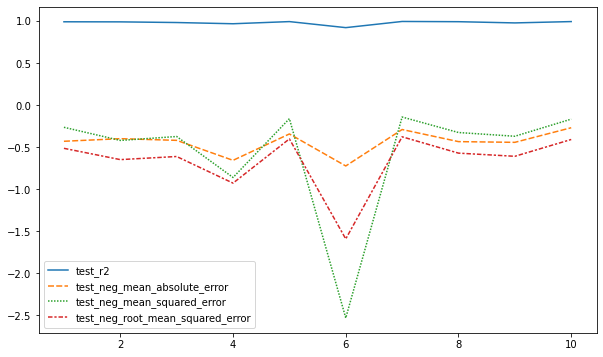

In [43]:
sns.lineplot(data = scores.iloc[:,2:])

In [44]:
pd.DataFrame(scores, index = range(1, 11)).iloc[:, 2:].mean()

test_r2                             0.978573
test_neg_mean_absolute_error       -0.441032
test_neg_mean_squared_error        -0.561648
test_neg_root_mean_squared_error   -0.666021
dtype: float64

In [45]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9825113234815029
MAE 		: 0.4824462638733485
MSE 		: 0.49374318166997244
RMSE 		: 0.7026686144050924


In [46]:
ridge_model.coef_

array([ 3.42882194e+00,  6.89086255e-01,  1.70305310e-01, -9.10849850e-01,
        2.72307731e+00,  1.12909099e-01, -4.04686020e-01,  2.87949856e-01,
       -9.19372975e-02, -1.01453529e+00, -7.53444103e-02, -7.08634181e-01,
        1.47325425e+00,  1.48905234e-01,  5.40673712e-03, -4.71916072e-01,
        3.11276849e-02, -9.14237139e-02,  1.09396990e-01, -2.94351259e-01,
       -6.99938835e-02, -1.79886016e-01, -4.82892097e-01, -2.41549754e-01,
       -7.04618089e-02,  7.81238085e-01, -3.29077891e-02,  2.16163202e-03,
       -2.86797937e-02, -1.86742942e-01,  1.13037228e-02, -7.09241901e-02,
       -3.59743483e-02,  1.26281214e-01,  4.53132216e-01,  4.90793990e-01,
        4.92974171e-01, -2.88060554e-01,  2.71083972e-01,  3.21890659e-01,
       -8.29982648e-01, -2.03685335e-01,  1.35189763e-01, -9.80952741e-03,
        3.54289982e-01, -1.69829768e-01,  1.01346413e-01, -3.94717549e-02,
       -2.36644809e-01,  1.65346682e-01,  3.01969498e-02,  9.30440340e-03,
        2.46705050e-02, -

In [47]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])

In [48]:
pd.concat([lm_df,rm_df], axis = 1)

lm_coef  ridge_coef_1
0    13.942084      3.428822
1    -3.147845      0.689086
2     0.622117      0.170305
3   -58.348614     -0.910850
4    17.227695      2.723077
5    -3.875031      0.112909
6    14.688014     -0.404686
7     0.835494      0.287950
8    -2.765824     -0.091937
9   115.503087     -1.014535
10  -28.684170     -0.075344
11   20.257596     -0.708634
12   -7.338979      1.473254
13  -19.840491      0.148905
14    9.183389      0.005407
15  -25.162985     -0.471916
16  -16.859628      0.031128
17   22.723785     -0.091424
18   -3.581168      0.109397
19 -103.955734     -0.294351
20   28.837309     -0.069994
21  -35.712475     -0.179886
22   -3.671007     -0.482892
23   39.849162     -0.241550
24  -15.897735     -0.070462
25    3.956800      0.781238
26    5.331437     -0.032908
27    7.516232      0.002162
28  -14.305237     -0.028680
29   22.095444     -0.186743
30   23.111981      0.011304
31  -12.074690     -0.070924
32  -29.920346     -0.035974
33   22.775684      0.126281
34   34.742828      0.453132
35  -12.527750      0.490794
36   18.231022      0.492974
37   11.082281     -0.288061
38  -24.335582      0.271084
39   13.039461      0.321891
40  -11.738058     -0.829983
41    7.369086     -0.203685
42  -15.865076      0.135190
43    8.171488     -0.009810
44    8.933054      0.354290
45  -10.070050     -0.169830
46    1.904587      0.101346
47    7.065967     -0.039472
48   -0.257477     -0.236645
49  -10.689878      0.165347
50   -5.390108      0.030197
51   -1.578588      0.009304
52   11.400894      0.024671
53    6.352215     -0.050716
54  -13.457603     -0.041555

## Choosing best alpha value with Cross-Validation

In [49]:
from sklearn.linear_model import RidgeCV

In [50]:
alpha_space = np.linspace(0.01, 1, 100)  # bu aralığı azaltıp arttırabilirsin. 
alpha_space                                # ama aldığımız sonuçlarda aman aman bir fark olmadığı için böyle bırakıyorum                          

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [51]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv = 10, scoring = "neg_root_mean_squared_error")

In [52]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [53]:
ridge_cv_model.alpha_

0.02

In [54]:
y_pred = ridge_cv_model.predict(X_test)

In [55]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9836426476759396
MAE 		: 0.4420870233388834
MSE 		: 0.4618034516011727
RMSE 		: 0.6795612199067665


In [56]:
y_train_pred = ridge_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred) 

Model testing performance:
--------------------------
R2_score 	: 0.9944909602193386
MAE 		: 0.24484201565155306
MSE 		: 0.14497674533119914
RMSE 		: 0.3807581191927483


In [57]:
ridge_cv_scores = {"ridge_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rcs = pd.DataFrame(ridge_cv_scores)
rcs

ridge_cv_train  ridge_cv_test
rmse        0.380758       0.679561
mae         0.244842       0.442087
mse         0.144977       0.461803
R2          0.994491       0.983643

In [58]:
pd.concat([ls, rs, rcs], axis = 1)

lm_train   lm_test  ridge_train  ridge_test  ridge_cv_train  \
rmse  0.250934  2.575820     0.545866    0.702669        0.380758   
mae   0.186213  0.665959     0.338149    0.482446        0.244842   
mse   0.062968  6.634847     0.297970    0.493743        0.144977   
R2    0.997607  0.764990     0.988677    0.982511        0.994491   

      ridge_cv_test  
rmse       0.679561  
mae        0.442087  
mse        0.461803  
R2         0.983643

In [59]:
ridge_cv_model.coef_

array([ 6.38304734e+00,  7.09275340e-01,  4.78837861e-01, -8.01548273e+00,
        3.99781291e+00, -7.14940285e-01, -5.09197284e-01,  7.27011610e-01,
       -8.83004868e-01,  2.24464524e+00, -3.19078191e+00, -8.74842987e-01,
        2.27543377e+00, -1.68730719e-01,  2.45578671e-01, -1.07397334e+00,
        7.07464247e-01, -1.51041420e+00,  1.39606956e+00,  3.19053345e+00,
        3.43601487e+00,  1.70954795e+00, -3.10657026e+00,  1.14268093e+00,
        3.21642379e-01,  1.73550780e+00, -9.42863852e-01, -4.20562003e-01,
       -3.39615652e-01, -4.52821031e-01,  5.50773131e-01, -9.34156866e-01,
        7.19128412e-02,  9.44445637e-01, -2.06804453e+00, -1.08621135e+00,
       -4.57557156e-01,  2.52819257e+00, -1.72169300e+00, -1.98950183e-01,
       -3.27642238e+00,  1.71668615e+00,  6.16710965e-01, -5.77460873e-03,
        1.41470288e+00, -9.16647115e-01, -1.48199235e-02,  5.87215930e-01,
       -4.21611654e-01,  5.23332129e-01, -4.18184387e-01,  3.63466766e-01,
        7.33072666e-01, -

In [60]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns=["Ridge_cv_coef_0.02"])

In [61]:
pd.concat([lm_df,rm_df, rcm_df], axis = 1)

# Alfa değerim büyüdükçe ( 0.02 den 1 olduğunda) coef katsayılarım azalıyor! 
# Dikkat! çok büyütürsek UNDERFITTING'e gider!!

lm_coef  ridge_coef_1  Ridge_cv_coef_0.02
0    13.942084      3.428822            6.383047
1    -3.147845      0.689086            0.709275
2     0.622117      0.170305            0.478838
3   -58.348614     -0.910850           -8.015483
4    17.227695      2.723077            3.997813
5    -3.875031      0.112909           -0.714940
6    14.688014     -0.404686           -0.509197
7     0.835494      0.287950            0.727012
8    -2.765824     -0.091937           -0.883005
9   115.503087     -1.014535            2.244645
10  -28.684170     -0.075344           -3.190782
11   20.257596     -0.708634           -0.874843
12   -7.338979      1.473254            2.275434
13  -19.840491      0.148905           -0.168731
14    9.183389      0.005407            0.245579
15  -25.162985     -0.471916           -1.073973
16  -16.859628      0.031128            0.707464
17   22.723785     -0.091424           -1.510414
18   -3.581168      0.109397            1.396070
19 -103.955734     -0.294351            3.190533
20   28.837309     -0.069994            3.436015
21  -35.712475     -0.179886            1.709548
22   -3.671007     -0.482892           -3.106570
23   39.849162     -0.241550            1.142681
24  -15.897735     -0.070462            0.321642
25    3.956800      0.781238            1.735508
26    5.331437     -0.032908           -0.942864
27    7.516232      0.002162           -0.420562
28  -14.305237     -0.028680           -0.339616
29   22.095444     -0.186743           -0.452821
30   23.111981      0.011304            0.550773
31  -12.074690     -0.070924           -0.934157
32  -29.920346     -0.035974            0.071913
33   22.775684      0.126281            0.944446
34   34.742828      0.453132           -2.068045
35  -12.527750      0.490794           -1.086211
36   18.231022      0.492974           -0.457557
37   11.082281     -0.288061            2.528193
38  -24.335582      0.271084           -1.721693
39   13.039461      0.321891           -0.198950
40  -11.738058     -0.829983           -3.276422
41    7.369086     -0.203685            1.716686
42  -15.865076      0.135190            0.616711
43    8.171488     -0.009810           -0.005775
44    8.933054      0.354290            1.414703
45  -10.070050     -0.169830           -0.916647
46    1.904587      0.101346           -0.014820
47    7.065967     -0.039472            0.587216
48   -0.257477     -0.236645           -0.421612
49  -10.689878      0.165347            0.523332
50   -5.390108      0.030197           -0.418184
51   -1.578588      0.009304            0.363467
52   11.400894      0.024671            0.733073
53    6.352215     -0.050716           -0.100478
54  -13.457603     -0.041555           -1.165271

## LASSO

In [62]:
from sklearn.linear_model import Lasso, LassoCV

In [63]:
lasso_model = Lasso(alpha = 1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=1)

In [64]:
y_train_pred = lasso_model.predict(X_train)

In [65]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.919650453855065
MAE 		: 1.0183549117463373
MSE 		: 2.1144911187286946
RMSE 		: 1.4541289897147


In [66]:
y_pred = lasso_model.predict(X_test)

In [67]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9185896601157192
MAE 		: 1.0179586607877587
MSE 		: 2.2983900578631644
RMSE 		: 1.5160442136900771


In [68]:
lasso_scores = {"lasso_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lss = pd.DataFrame(lasso_scores)
lss

lasso_train  lasso_test
rmse     1.454129    1.516044
mae      1.018355    1.017959
mse      2.114491    2.298390
R2       0.919650    0.918590

In [69]:
pd.concat([ls, rs, rcs, lss], axis = 1)

lm_train   lm_test  ridge_train  ridge_test  ridge_cv_train  \
rmse  0.250934  2.575820     0.545866    0.702669        0.380758   
mae   0.186213  0.665959     0.338149    0.482446        0.244842   
mse   0.062968  6.634847     0.297970    0.493743        0.144977   
R2    0.997607  0.764990     0.988677    0.982511        0.994491   

      ridge_cv_test  lasso_train  lasso_test  
rmse       0.679561     1.454129    1.516044  
mae        0.442087     1.018355    1.017959  
mse        0.461803     2.114491    2.298390  
R2         0.983643     0.919650    0.918590

## For Lasso CV with Default Alpha : 1

In [70]:
model = Lasso(alpha=1)
scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [71]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

test_r2  test_neg_mean_absolute_error  test_neg_mean_squared_error  \
1   0.955947                     -0.888044                    -1.077594   
2   0.903583                     -1.372171                    -3.461746   
3   0.968382                     -0.565185                    -0.602683   
4   0.938413                     -0.813635                    -1.551711   
5   0.943817                     -0.847035                    -1.063069   
6   0.829658                     -1.304584                    -5.369549   
7   0.955279                     -0.689034                    -0.910175   
8   0.857451                     -1.790809                    -4.795721   
9   0.920257                     -0.901485                    -1.222707   
10  0.887138                     -1.218712                    -2.260339   

    test_neg_root_mean_squared_error  
1                          -1.038072  
2                          -1.860577  
3                          -0.776327  
4                          -1.245677  
5                          -1.031052  
6                          -2.317229  
7                          -0.954031  
8                          -2.189913  
9                          -1.105761  
10                         -1.503442

In [2]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

NameError: name 'pd' is not defined

<AxesSubplot:>

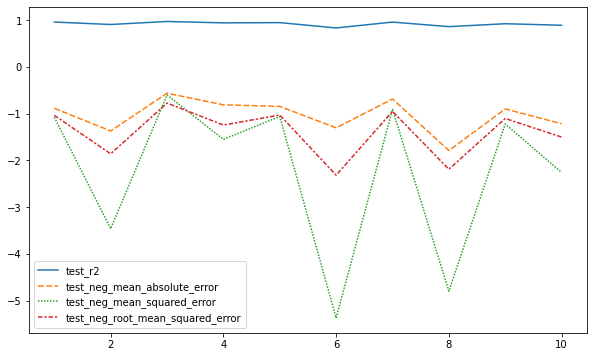

In [72]:
sns.lineplot(data = scores.iloc[:,2:])

In [73]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             0.915992
test_neg_mean_absolute_error       -1.039070
test_neg_mean_squared_error        -2.231529
test_neg_root_mean_squared_error   -1.402208
dtype: float64

In [74]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9185896601157192
MAE 		: 1.0179586607877587
MSE 		: 2.2983900578631644
RMSE 		: 1.5160442136900771


In [75]:
lasso_model.coef_

# Lasso bana en önemli feature'u veriyor. Doğrudan bu feature en önemlisi diyebilirim.

array([0.6960164 , 0.        , 0.        , 0.        , 3.49094634,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [76]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [77]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1)

lm_coef  ridge_coef_1  Ridge_cv_coef_0.02  lasso_coef_1
0    13.942084      3.428822            6.383047      0.696016
1    -3.147845      0.689086            0.709275      0.000000
2     0.622117      0.170305            0.478838      0.000000
3   -58.348614     -0.910850           -8.015483      0.000000
4    17.227695      2.723077            3.997813      3.490946
5    -3.875031      0.112909           -0.714940      0.000000
6    14.688014     -0.404686           -0.509197      0.000000
7     0.835494      0.287950            0.727012      0.000000
8    -2.765824     -0.091937           -0.883005      0.000000
9   115.503087     -1.014535            2.244645      0.000000
10  -28.684170     -0.075344           -3.190782      0.000000
11   20.257596     -0.708634           -0.874843      0.000000
12   -7.338979      1.473254            2.275434      0.000000
13  -19.840491      0.148905           -0.168731      0.000000
14    9.183389      0.005407            0.245579      0.000000
15  -25.162985     -0.471916           -1.073973      0.000000
16  -16.859628      0.031128            0.707464      0.000000
17   22.723785     -0.091424           -1.510414      0.000000
18   -3.581168      0.109397            1.396070      0.000000
19 -103.955734     -0.294351            3.190533      0.000000
20   28.837309     -0.069994            3.436015      0.000000
21  -35.712475     -0.179886            1.709548      0.000000
22   -3.671007     -0.482892           -3.106570      0.000000
23   39.849162     -0.241550            1.142681      0.000000
24  -15.897735     -0.070462            0.321642      0.000000
25    3.956800      0.781238            1.735508      0.000000
26    5.331437     -0.032908           -0.942864      0.000000
27    7.516232      0.002162           -0.420562      0.000000
28  -14.305237     -0.028680           -0.339616      0.000000
29   22.095444     -0.186743           -0.452821      0.000000
30   23.111981      0.011304            0.550773      0.000000
31  -12.074690     -0.070924           -0.934157      0.000000
32  -29.920346     -0.035974            0.071913      0.000000
33   22.775684      0.126281            0.944446      0.000000
34   34.742828      0.453132           -2.068045      0.000000
35  -12.527750      0.490794           -1.086211      0.000000
36   18.231022      0.492974           -0.457557      0.000000
37   11.082281     -0.288061            2.528193      0.000000
38  -24.335582      0.271084           -1.721693      0.000000
39   13.039461      0.321891           -0.198950      0.000000
40  -11.738058     -0.829983           -3.276422      0.000000
41    7.369086     -0.203685            1.716686      0.000000
42  -15.865076      0.135190            0.616711      0.000000
43    8.171488     -0.009810           -0.005775      0.000000
44    8.933054      0.354290            1.414703      0.000000
45  -10.070050     -0.169830           -0.916647      0.000000
46    1.904587      0.101346           -0.014820      0.000000
47    7.065967     -0.039472            0.587216      0.000000
48   -0.257477     -0.236645           -0.421612      0.000000
49  -10.689878      0.165347            0.523332      0.000000
50   -5.390108      0.030197           -0.418184      0.000000
51   -1.578588      0.009304            0.363467      0.000000
52   11.400894      0.024671            0.733073      0.000000
53    6.352215     -0.050716           -0.100478      0.000000
54  -13.457603     -0.041555           -1.165271      0.000000

### Choosing best alpha value with Cross-Validation

In [78]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10, max_iter = 100000) 

 # max_iter defaultu 1. Hata alırsan max_iter yetersiz kalmış demektir, bu değeri arttır. 100000 yapabilirsin. 

# NEDEN? ?????????????????????? BURAYA HOCANIN NOTUNU EKLE. saat:16:05-16:08

In [79]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, max_iter=100000)

In [80]:
lasso_cv_model.alpha_

0.01

In [81]:
y_train_pred = lasso_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9888244250353099
MAE 		: 0.33906533633271657
MSE 		: 0.2940981641252691
RMSE 		: 0.5423081818719584


In [82]:
y_pred = lasso_cv_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9862951034658218
MAE 		: 0.440975200468038
MSE 		: 0.3869188850331833
RMSE 		: 0.6220280419990591


In [83]:
lasso_cv_scores = {"lasso_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lcs = pd.DataFrame(lasso_cv_scores)
lcs

lasso_cv_train  lasso_cv_test
rmse        0.542308       0.622028
mae         0.339065       0.440975
mse         0.294098       0.386919
R2          0.988824       0.986295

In [84]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

lm_train   lm_test  ridge_train  ridge_test  ridge_cv_train  \
rmse  0.250934  2.575820     0.545866    0.702669        0.380758   
mae   0.186213  0.665959     0.338149    0.482446        0.244842   
mse   0.062968  6.634847     0.297970    0.493743        0.144977   
R2    0.997607  0.764990     0.988677    0.982511        0.994491   

      ridge_cv_test  lasso_train  lasso_test  lasso_cv_train  lasso_cv_test  
rmse       0.679561     1.454129    1.516044        0.542308       0.622028  
mae        0.442087     1.018355    1.017959        0.339065       0.440975  
mse        0.461803     2.114491    2.298390        0.294098       0.386919  
R2         0.983643     0.919650    0.918590        0.988824       0.986295

In [85]:
lasso_cv_model.coef_

array([ 4.27021377,  0.18037374,  0.13965856, -3.14605513,  4.15339959,
       -0.        ,  0.        ,  0.06249654,  0.        , -0.        ,
       -0.43049816, -0.17433788,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.4873868 ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.06929818,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [86]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.01"])

In [87]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1)

lm_coef  ridge_coef_1  Ridge_cv_coef_0.02  lasso_coef_1  \
0    13.942084      3.428822            6.383047      0.696016   
1    -3.147845      0.689086            0.709275      0.000000   
2     0.622117      0.170305            0.478838      0.000000   
3   -58.348614     -0.910850           -8.015483      0.000000   
4    17.227695      2.723077            3.997813      3.490946   
5    -3.875031      0.112909           -0.714940      0.000000   
6    14.688014     -0.404686           -0.509197      0.000000   
7     0.835494      0.287950            0.727012      0.000000   
8    -2.765824     -0.091937           -0.883005      0.000000   
9   115.503087     -1.014535            2.244645      0.000000   
10  -28.684170     -0.075344           -3.190782      0.000000   
11   20.257596     -0.708634           -0.874843      0.000000   
12   -7.338979      1.473254            2.275434      0.000000   
13  -19.840491      0.148905           -0.168731      0.000000   
14    9.183389      0.005407            0.245579      0.000000   
15  -25.162985     -0.471916           -1.073973      0.000000   
16  -16.859628      0.031128            0.707464      0.000000   
17   22.723785     -0.091424           -1.510414      0.000000   
18   -3.581168      0.109397            1.396070      0.000000   
19 -103.955734     -0.294351            3.190533      0.000000   
20   28.837309     -0.069994            3.436015      0.000000   
21  -35.712475     -0.179886            1.709548      0.000000   
22   -3.671007     -0.482892           -3.106570      0.000000   
23   39.849162     -0.241550            1.142681      0.000000   
24  -15.897735     -0.070462            0.321642      0.000000   
25    3.956800      0.781238            1.735508      0.000000   
26    5.331437     -0.032908           -0.942864      0.000000   
27    7.516232      0.002162           -0.420562      0.000000   
28  -14.305237     -0.028680           -0.339616      0.000000   
29   22.095444     -0.186743           -0.452821      0.000000   
30   23.111981      0.011304            0.550773      0.000000   
31  -12.074690     -0.070924           -0.934157      0.000000   
32  -29.920346     -0.035974            0.071913      0.000000   
33   22.775684      0.126281            0.944446      0.000000   
34   34.742828      0.453132           -2.068045      0.000000   
35  -12.527750      0.490794           -1.086211      0.000000   
36   18.231022      0.492974           -0.457557      0.000000   
37   11.082281     -0.288061            2.528193      0.000000   
38  -24.335582      0.271084           -1.721693      0.000000   
39   13.039461      0.321891           -0.198950      0.000000   
40  -11.738058     -0.829983           -3.276422      0.000000   
41    7.369086     -0.203685            1.716686      0.000000   
42  -15.865076      0.135190            0.616711      0.000000   
43    8.171488     -0.009810           -0.005775      0.000000   
44    8.933054      0.354290            1.414703      0.000000   
45  -10.070050     -0.169830           -0.916647      0.000000   
46    1.904587      0.101346           -0.014820      0.000000   
47    7.065967     -0.039472            0.587216      0.000000   
48   -0.257477     -0.236645           -0.421612      0.000000   
49  -10.689878      0.165347            0.523332      0.000000   
50   -5.390108      0.030197           -0.418184      0.000000   
51   -1.578588      0.009304            0.363467      0.000000   
52   11.400894      0.024671            0.733073      0.000000   
53    6.352215     -0.050716           -0.100478      0.000000   
54  -13.457603     -0.041555           -1.165271      0.000000   

    lasso_cv_coef_0.01  
0             4.270214  
1             0.180374  
2             0.139659  
3            -3.146055  
4             4.153400  
5            -0.000000  
6             0.000000  
7             0.062497  
8             0.000000  
9            -0.000000  
10           -0.430498  
11        

In [ ]:
alfa sinir katsayısı gibi. birinde (Ridge) hatayı sıfıra yaklaştırıyor öbüründe (Lasso) kelle alıyor.

## Elastic net

In [88]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [89]:
elastic_model = ElasticNet()
elastic_model.fit(X_train, y_train)

ElasticNet()

In [90]:
elastic_model.l1_ratio

0.5

In [91]:
elastic_model.alpha

1.0

In [92]:
y_train_pred = elastic_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.896125980369787
MAE 		: 1.24848020328436
MSE 		: 2.733564811661118
RMSE 		: 1.6533495733392616


In [93]:
y_pred = elastic_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9020164827239767
MAE 		: 1.2006537964645352
MSE 		: 2.766286718146463
RMSE 		: 1.6632157761837347


In [94]:
elastic_scores = {"elastic_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
es = pd.DataFrame(elastic_scores)
es

elastic_train  elastic_test
rmse       1.653350      1.663216
mae        1.248480      1.200654
mse        2.733565      2.766287
R2         0.896126      0.902016

In [95]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

lm_train   lm_test  ridge_train  ridge_test  ridge_cv_train  \
rmse  0.250934  2.575820     0.545866    0.702669        0.380758   
mae   0.186213  0.665959     0.338149    0.482446        0.244842   
mse   0.062968  6.634847     0.297970    0.493743        0.144977   
R2    0.997607  0.764990     0.988677    0.982511        0.994491   

      ridge_cv_test  lasso_train  lasso_test  lasso_cv_train  lasso_cv_test  \
rmse       0.679561     1.454129    1.516044        0.542308       0.622028   
mae        0.442087     1.018355    1.017959        0.339065       0.440975   
mse        0.461803     2.114491    2.298390        0.294098       0.386919   
R2         0.983643     0.919650    0.918590        0.988824       0.986295   

      elastic_train  elastic_test  
rmse       1.653350      1.663216  
mae        1.248480      1.200654  
mse        2.733565      2.766287  
R2         0.896126      0.902016

In [96]:
elastic_model.coef_

array([ 0.8629361 ,  0.2114429 ,  0.        ,  0.29076735,  0.98099122,
        0.00249769,  0.        ,  0.        ,  0.        ,  0.        ,
        0.52021768,  0.        ,  0.6023984 ,  0.09615974,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.15970242,  0.        ,  0.27423182,  0.        ,  0.        ,
        0.3407246 ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.0826519 ,  0.        ,  0.        ,  0.        ,  0.15709256,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [97]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

In [98]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1)

lm_coef  ridge_coef_1  Ridge_cv_coef_0.02  lasso_coef_1  \
0    13.942084      3.428822            6.383047      0.696016   
1    -3.147845      0.689086            0.709275      0.000000   
2     0.622117      0.170305            0.478838      0.000000   
3   -58.348614     -0.910850           -8.015483      0.000000   
4    17.227695      2.723077            3.997813      3.490946   
5    -3.875031      0.112909           -0.714940      0.000000   
6    14.688014     -0.404686           -0.509197      0.000000   
7     0.835494      0.287950            0.727012      0.000000   
8    -2.765824     -0.091937           -0.883005      0.000000   
9   115.503087     -1.014535            2.244645      0.000000   
10  -28.684170     -0.075344           -3.190782      0.000000   
11   20.257596     -0.708634           -0.874843      0.000000   
12   -7.338979      1.473254            2.275434      0.000000   
13  -19.840491      0.148905           -0.168731      0.000000   
14    9.183389      0.005407            0.245579      0.000000   
15  -25.162985     -0.471916           -1.073973      0.000000   
16  -16.859628      0.031128            0.707464      0.000000   
17   22.723785     -0.091424           -1.510414      0.000000   
18   -3.581168      0.109397            1.396070      0.000000   
19 -103.955734     -0.294351            3.190533      0.000000   
20   28.837309     -0.069994            3.436015      0.000000   
21  -35.712475     -0.179886            1.709548      0.000000   
22   -3.671007     -0.482892           -3.106570      0.000000   
23   39.849162     -0.241550            1.142681      0.000000   
24  -15.897735     -0.070462            0.321642      0.000000   
25    3.956800      0.781238            1.735508      0.000000   
26    5.331437     -0.032908           -0.942864      0.000000   
27    7.516232      0.002162           -0.420562      0.000000   
28  -14.305237     -0.028680           -0.339616      0.000000   
29   22.095444     -0.186743           -0.452821      0.000000   
30   23.111981      0.011304            0.550773      0.000000   
31  -12.074690     -0.070924           -0.934157      0.000000   
32  -29.920346     -0.035974            0.071913      0.000000   
33   22.775684      0.126281            0.944446      0.000000   
34   34.742828      0.453132           -2.068045      0.000000   
35  -12.527750      0.490794           -1.086211      0.000000   
36   18.231022      0.492974           -0.457557      0.000000   
37   11.082281     -0.288061            2.528193      0.000000   
38  -24.335582      0.271084           -1.721693      0.000000   
39   13.039461      0.321891           -0.198950      0.000000   
40  -11.738058     -0.829983           -3.276422      0.000000   
41    7.369086     -0.203685            1.716686      0.000000   
42  -15.865076      0.135190            0.616711      0.000000   
43    8.171488     -0.009810           -0.005775      0.000000   
44    8.933054      0.354290            1.414703      0.000000   
45  -10.070050     -0.169830           -0.916647      0.000000   
46    1.904587      0.101346           -0.014820      0.000000   
47    7.065967     -0.039472            0.587216      0.000000   
48   -0.257477     -0.236645           -0.421612      0.000000   
49  -10.689878      0.165347            0.523332      0.000000   
50   -5.390108      0.030197           -0.418184      0.000000   
51   -1.578588      0.009304            0.363467      0.000000   
52   11.400894      0.024671            0.733073      0.000000   
53    6.352215     -0.050716           -0.100478      0.000000   
54  -13.457603     -0.041555           -1.165271      0.000000   

    lasso_cv_coef_0.01  elastic_coef_(alp:1, l1:0.5)  
0             4.270214                      0.862936  
1             0.180374                      0.211443  
2             0.139659                      0.000000  
3            -3.146055                      0.290767  
4             4.153400             

In [99]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 10, max_iter = 100000)

# elastic_cv modeline alpha_space aralığını ve l1_ratio aralığını verdim. 100 alfadan, 6 l1_ratio'dan toplam 600 kombinasyonu 
# her seferinde 10 defa cross validation yaparak her seferinde elde ettiği en iyi alfa değerini verecek.  

 

In [100]:
elastic_cv_model.fit(X_train, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=10, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000)

In [101]:
elastic_cv_model.alpha_

# lasso ile ridge i karşılaştırdı. lassonun daha uygun olduğunu görüp lassonun alpha değerini verdi. 
# zaten elasticnet'in lasso ya yatkın olduğunu biliyorduk 

# l1_ratio = 1 olduğu için elasticnet modeli aslında lasso’ya dönüştü. 
# Lasso’da da en iyi alpha değeri 0.01 olduğu için tekrar onu seçti

0.01

In [102]:
elastic_cv_model.l1_ratio_

1.0

In [103]:
elastic_cv_model.coef_

array([ 4.27021377,  0.18037374,  0.13965856, -3.14605513,  4.15339959,
       -0.        ,  0.        ,  0.06249654,  0.        , -0.        ,
       -0.43049816, -0.17433788,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.4873868 ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.06929818,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [104]:
ecm_df = pd.DataFrame(elastic_cv_model.coef_, columns=["elastic_coef_(alp:0.01, l1:1)"])

In [105]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df, ecm_df], axis = 1)

lm_coef  ridge_coef_1  Ridge_cv_coef_0.02  lasso_coef_1  \
0    13.942084      3.428822            6.383047      0.696016   
1    -3.147845      0.689086            0.709275      0.000000   
2     0.622117      0.170305            0.478838      0.000000   
3   -58.348614     -0.910850           -8.015483      0.000000   
4    17.227695      2.723077            3.997813      3.490946   
5    -3.875031      0.112909           -0.714940      0.000000   
6    14.688014     -0.404686           -0.509197      0.000000   
7     0.835494      0.287950            0.727012      0.000000   
8    -2.765824     -0.091937           -0.883005      0.000000   
9   115.503087     -1.014535            2.244645      0.000000   
10  -28.684170     -0.075344           -3.190782      0.000000   
11   20.257596     -0.708634           -0.874843      0.000000   
12   -7.338979      1.473254            2.275434      0.000000   
13  -19.840491      0.148905           -0.168731      0.000000   
14    9.183389      0.005407            0.245579      0.000000   
15  -25.162985     -0.471916           -1.073973      0.000000   
16  -16.859628      0.031128            0.707464      0.000000   
17   22.723785     -0.091424           -1.510414      0.000000   
18   -3.581168      0.109397            1.396070      0.000000   
19 -103.955734     -0.294351            3.190533      0.000000   
20   28.837309     -0.069994            3.436015      0.000000   
21  -35.712475     -0.179886            1.709548      0.000000   
22   -3.671007     -0.482892           -3.106570      0.000000   
23   39.849162     -0.241550            1.142681      0.000000   
24  -15.897735     -0.070462            0.321642      0.000000   
25    3.956800      0.781238            1.735508      0.000000   
26    5.331437     -0.032908           -0.942864      0.000000   
27    7.516232      0.002162           -0.420562      0.000000   
28  -14.305237     -0.028680           -0.339616      0.000000   
29   22.095444     -0.186743           -0.452821      0.000000   
30   23.111981      0.011304            0.550773      0.000000   
31  -12.074690     -0.070924           -0.934157      0.000000   
32  -29.920346     -0.035974            0.071913      0.000000   
33   22.775684      0.126281            0.944446      0.000000   
34   34.742828      0.453132           -2.068045      0.000000   
35  -12.527750      0.490794           -1.086211      0.000000   
36   18.231022      0.492974           -0.457557      0.000000   
37   11.082281     -0.288061            2.528193      0.000000   
38  -24.335582      0.271084           -1.721693      0.000000   
39   13.039461      0.321891           -0.198950      0.000000   
40  -11.738058     -0.829983           -3.276422      0.000000   
41    7.369086     -0.203685            1.716686      0.000000   
42  -15.865076      0.135190            0.616711      0.000000   
43    8.171488     -0.009810           -0.005775      0.000000   
44    8.933054      0.354290            1.414703      0.000000   
45  -10.070050     -0.169830           -0.916647      0.000000   
46    1.904587      0.101346           -0.014820      0.000000   
47    7.065967     -0.039472            0.587216      0.000000   
48   -0.257477     -0.236645           -0.421612      0.000000   
49  -10.689878      0.165347            0.523332      0.000000   
50   -5.390108      0.030197           -0.418184      0.000000   
51   -1.578588      0.009304            0.363467      0.000000   
52   11.400894      0.024671            0.733073      0.000000   
53    6.352215     -0.050716           -0.100478      0.000000   
54  -13.457603     -0.041555           -1.165271      0.000000   

    lasso_cv_coef_0.01  elastic_coef_(alp:1, l1:0.5)  \
0             4.270214                      0.862936   
1             0.180374                      0.211443   
2             0.139659                      0.000000   
3            -3.146055                      0.290767   
4             4.153400        

In [106]:
y_train_pred = elastic_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9888244250353099
MAE 		: 0.33906533633271657
MSE 		: 0.2940981641252691
RMSE 		: 0.5423081818719584


In [107]:
y_pred = elastic_cv_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9862951034658218
MAE 		: 0.440975200468038
MSE 		: 0.3869188850331833
RMSE 		: 0.6220280419990591


In [108]:
elastic_cv_scores = {"elastic_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ecs = pd.DataFrame(elastic_cv_scores)
ecs

elastic_cv_train  elastic_cv_test
rmse          0.542308         0.622028
mae           0.339065         0.440975
mse           0.294098         0.386919
R2            0.988824         0.986295

In [109]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs], axis = 1)

lm_train   lm_test  ridge_train  ridge_test  ridge_cv_train  \
rmse  0.250934  2.575820     0.545866    0.702669        0.380758   
mae   0.186213  0.665959     0.338149    0.482446        0.244842   
mse   0.062968  6.634847     0.297970    0.493743        0.144977   
R2    0.997607  0.764990     0.988677    0.982511        0.994491   

      ridge_cv_test  lasso_train  lasso_test  lasso_cv_train  lasso_cv_test  \
rmse       0.679561     1.454129    1.516044        0.542308       0.622028   
mae        0.442087     1.018355    1.017959        0.339065       0.440975   
mse        0.461803     2.114491    2.298390        0.294098       0.386919   
R2         0.983643     0.919650    0.918590        0.988824       0.986295   

      elastic_train  elastic_test  elastic_cv_train  elastic_cv_test  
rmse       1.653350      1.663216          0.542308         0.622028  
mae        1.248480      1.200654          0.339065         0.440975  
mse        2.733565      2.766287          0.294098         0.386919  
R2         0.896126      0.902016          0.988824         0.986295

## Grid Search

In [ ]:
ridge ve lasso sadece alpha yı kullanır. (alpha ya ilave olarak)  l1_ratio yu elastic te kullanıyoruz. 

l1_ratio değeri ile lassaya ne oranda benzediğini anlıyoruz; 1 ise %100 lasso oluyor.

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
elastic_model = ElasticNet(max_iter=10000)

In [112]:
param_grid ={"alpha":[0.01, 0.02, 0.1, 1, 5, 10, 50, 100],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

# kullanabileceğimiz değerler az çok belli. o aralığı kullanıyoruz.
# l1_ratio zaten 0 la 1 arasında oluyor. 

In [113]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [114]:
grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 56 candidates, totalling 560 fits
[CV] alpha=0.01, l1_ratio=0.1 ........................................
[CV] ......................... alpha=0.01, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.1 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ......................... alpha=0.01, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.1 ........................................
[CV] ......................... alpha=0.01, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.1 ........................................
[CV] ......................... alpha=0.01, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.1 ........................................
[CV] ......................... alpha=0.01, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.1 ........................................
[CV] ......................... alpha=0.01, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.1 ........................................
[CV] ......................... alpha=0.01, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.1 ........................................
[CV] ......................... alpha=0.01, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.1 ........................................
[CV] .

[CV] ........................... alpha=0.01, l1_ratio=1, total=   0.0s
[CV] alpha=0.01, l1_ratio=1 ..........................................
[CV] ........................... alpha=0.01, l1_ratio=1, total=   0.0s
[CV] alpha=0.01, l1_ratio=1 ..........................................
[CV] ........................... alpha=0.01, l1_ratio=1, total=   0.0s
[CV] alpha=0.01, l1_ratio=1 ..........................................
[CV] ........................... alpha=0.01, l1_ratio=1, total=   0.0s
[CV] alpha=0.01, l1_ratio=1 ..........................................
[CV] ........................... alpha=0.01, l1_ratio=1, total=   0.0s
[CV] alpha=0.02, l1_ratio=0.1 ........................................
[CV] ......................... alpha=0.02, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.02, l1_ratio=0.1 ........................................
[CV] ......................... alpha=0.02, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.02, l1_ratio=0.1 ........................................
[CV] .

[CV] ........................ alpha=0.02, l1_ratio=0.99, total=   0.0s
[CV] alpha=0.02, l1_ratio=0.99 .......................................
[CV] ........................ alpha=0.02, l1_ratio=0.99, total=   0.0s
[CV] alpha=0.02, l1_ratio=0.99 .......................................
[CV] ........................ alpha=0.02, l1_ratio=0.99, total=   0.0s
[CV] alpha=0.02, l1_ratio=0.99 .......................................
[CV] ........................ alpha=0.02, l1_ratio=0.99, total=   0.0s
[CV] alpha=0.02, l1_ratio=0.99 .......................................
[CV] ........................ alpha=0.02, l1_ratio=0.99, total=   0.0s
[CV] alpha=0.02, l1_ratio=0.99 .......................................
[CV] ........................ alpha=0.02, l1_ratio=0.99, total=   0.0s
[CV] alpha=0.02, l1_ratio=1 ..........................................
[CV] ........................... alpha=0.02, l1_ratio=1, total=   0.0s
[CV] alpha=0.02, l1_ratio=1 ..........................................
[CV] .

[CV] ......................... alpha=0.1, l1_ratio=0.95, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.95 ........................................
[CV] ......................... alpha=0.1, l1_ratio=0.95, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.99 ........................................
[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.99 ........................................
[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.99 ........................................
[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.99 ........................................
[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.99 ........................................
[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.99 ........................................
[CV] .

[CV] ........................... alpha=1, l1_ratio=0.95, total=   0.0s
[CV] alpha=1, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.95, total=   0.0s
[CV] alpha=1, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.95, total=   0.0s
[CV] alpha=1, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.95, total=   0.0s
[CV] alpha=1, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.95, total=   0.0s
[CV] alpha=1, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.95, total=   0.0s
[CV] alpha=1, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.95, total=   0.0s
[CV] alpha=1, l1_ratio=0.95 ..........................................
[CV] .

[CV] ............................ alpha=5, l1_ratio=0.9, total=   0.0s
[CV] alpha=5, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.9, total=   0.0s
[CV] alpha=5, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.9, total=   0.0s
[CV] alpha=5, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.9, total=   0.0s
[CV] alpha=5, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=5, l1_ratio=0.95, total=   0.0s
[CV] alpha=5, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=5, l1_ratio=0.95, total=   0.0s
[CV] alpha=5, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=5, l1_ratio=0.95, total=   0.0s
[CV] alpha=5, l1_ratio=0.95 ..........................................
[CV] .

[CV] ........................... alpha=10, l1_ratio=0.9, total=   0.0s
[CV] alpha=10, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.9, total=   0.0s
[CV] alpha=10, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.9, total=   0.0s
[CV] alpha=10, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.9, total=   0.0s
[CV] alpha=10, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.9, total=   0.0s
[CV] alpha=10, l1_ratio=0.95 .........................................
[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.0s
[CV] alpha=10, l1_ratio=0.95 .........................................
[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.0s
[CV] alpha=10, l1_ratio=0.95 .........................................
[CV] .

[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] .

[CV] .......................... alpha=100, l1_ratio=0.7, total=   0.0s
[CV] alpha=100, l1_ratio=0.7 .........................................
[CV] .......................... alpha=100, l1_ratio=0.7, total=   0.0s
[CV] alpha=100, l1_ratio=0.9 .........................................
[CV] .......................... alpha=100, l1_ratio=0.9, total=   0.0s
[CV] alpha=100, l1_ratio=0.9 .........................................
[CV] .......................... alpha=100, l1_ratio=0.9, total=   0.0s
[CV] alpha=100, l1_ratio=0.9 .........................................
[CV] .......................... alpha=100, l1_ratio=0.9, total=   0.0s
[CV] alpha=100, l1_ratio=0.9 .........................................
[CV] .......................... alpha=100, l1_ratio=0.9, total=   0.0s
[CV] alpha=100, l1_ratio=0.9 .........................................
[CV] .......................... alpha=100, l1_ratio=0.9, total=   0.0s
[CV] alpha=100, l1_ratio=0.9 .........................................
[CV] .

[Parallel(n_jobs=1)]: Done 560 out of 560 | elapsed:    2.5s finished


GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [0.01, 0.02, 0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [115]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 1}

In [116]:
pd.DataFrame(grid_model.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.026397      0.004883         0.000656        0.000451        0.01   
1        0.006897      0.001446         0.000401        0.000491        0.01   
2        0.006297      0.001487         0.000601        0.000491        0.01   
3        0.009467      0.002054         0.000533        0.000475        0.01   
4        0.008001      0.001614         0.000699        0.000458        0.01   
5        0.008452      0.002028         0.000500        0.000500        0.01   
6        0.007696      0.001419         0.000301        0.000460        0.01   
7        0.012598      0.002199         0.000501        0.000501        0.02   
8        0.003498      0.000803         0.000402        0.000492        0.02   
9        0.003698      0.001004         0.000402        0.000492        0.02   
10       0.004351      0.001181         0.000801        0.000401        0.02   
11       0.005499      0.001687         0.000700        0.000458        0.02   
12       0.007400      0.002153         0.000601        0.000491        0.02   
13       0.006099      0.001446         0.000300        0.000458        0.02   
14       0.006361      0.001039         0.000500        0.000500         0.1   
15       0.002601      0.000491         0.000500        0.000500         0.1   
16       0.001999      0.000445         0.000301        0.000460         0.1   
17       0.001900      0.000300         0.000300        0.000458         0.1   
18       0.001900      0.000540         0.000301        0.000459         0.1   
19       0.002001      0.000631         0.000500        0.000500         0.1   
20       0.001999      0.000446         0.000400        0.000490         0.1   
21       0.001897      0.000541         0.000600        0.000490           1   
22       0.001899      0.000538         0.000500        0.000500           1   
23       0.001600      0.000490         0.000500        0.000500           1   
24       0.001400      0.000490         0.000500        0.000500           1   
25       0.001800      0.000400         0.000501        0.000501           1   
26       0.001598      0.000490         0.000500        0.000500           1   
27       0.002000      0.000448         0.000498        0.000498           1   
28       0.001901      0.000540         0.000200        0.000400           5   
29       0.001700      0.000458         0.000601        0.000491           5   
30       0.001697      0.000457         0.000400        0.000490           5   
31       0.001500      0.000500         0.000701        0.000459           5   
32       0.001700      0.000459         0.000299        0.000457           5   
33       0.001800      0.000599         0.000400        0.000490           5   
34       0.001901      0.000832         0.000499        0.000499           5   
35       0.001500      0.000500         0.000400        0.000490          10   
36       0.001799      0.000602         0.000401        0.000491          10   
37       0.001400      0.000490         0.000400        0.000490          10   
38       0.001800      0.000600         0.000602        0.000492          10   
39       0.001600      0.000490         0.000500        0.000500          10   
40       0.001699      0.000642         0.000403        0.000493          10   
41       0.001500      0.000500         0.000599        0.000489          10   
42       0.001501      0.000500         0.000500        0.000500          50   
43       0.001402      0.000492         0.000300        0.000458          50   
44       0.001500      0.000498         0.000400        0.000490          50   
45       0.001899      0.000702         0.000599        0.000489          50   
46       0.001398      0.000488         0.000602        0.000491          50   
47       0.001702      0.000781         0.000799        0.000399          50   
48       0.001799      0.000399         0.000299        0.000457          50   
49  

In [117]:
# new_model = ElasticNet(alpha =0.01, l1_ratio=1)

## Using Best Model From GridSearch

In [118]:
y_pred = grid_model.predict(X_test)

In [119]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9862951034658218
MAE 		: 0.440975200468038
MSE 		: 0.3869188850331833
RMSE 		: 0.6220280419990591


## Feature importances with Ridge

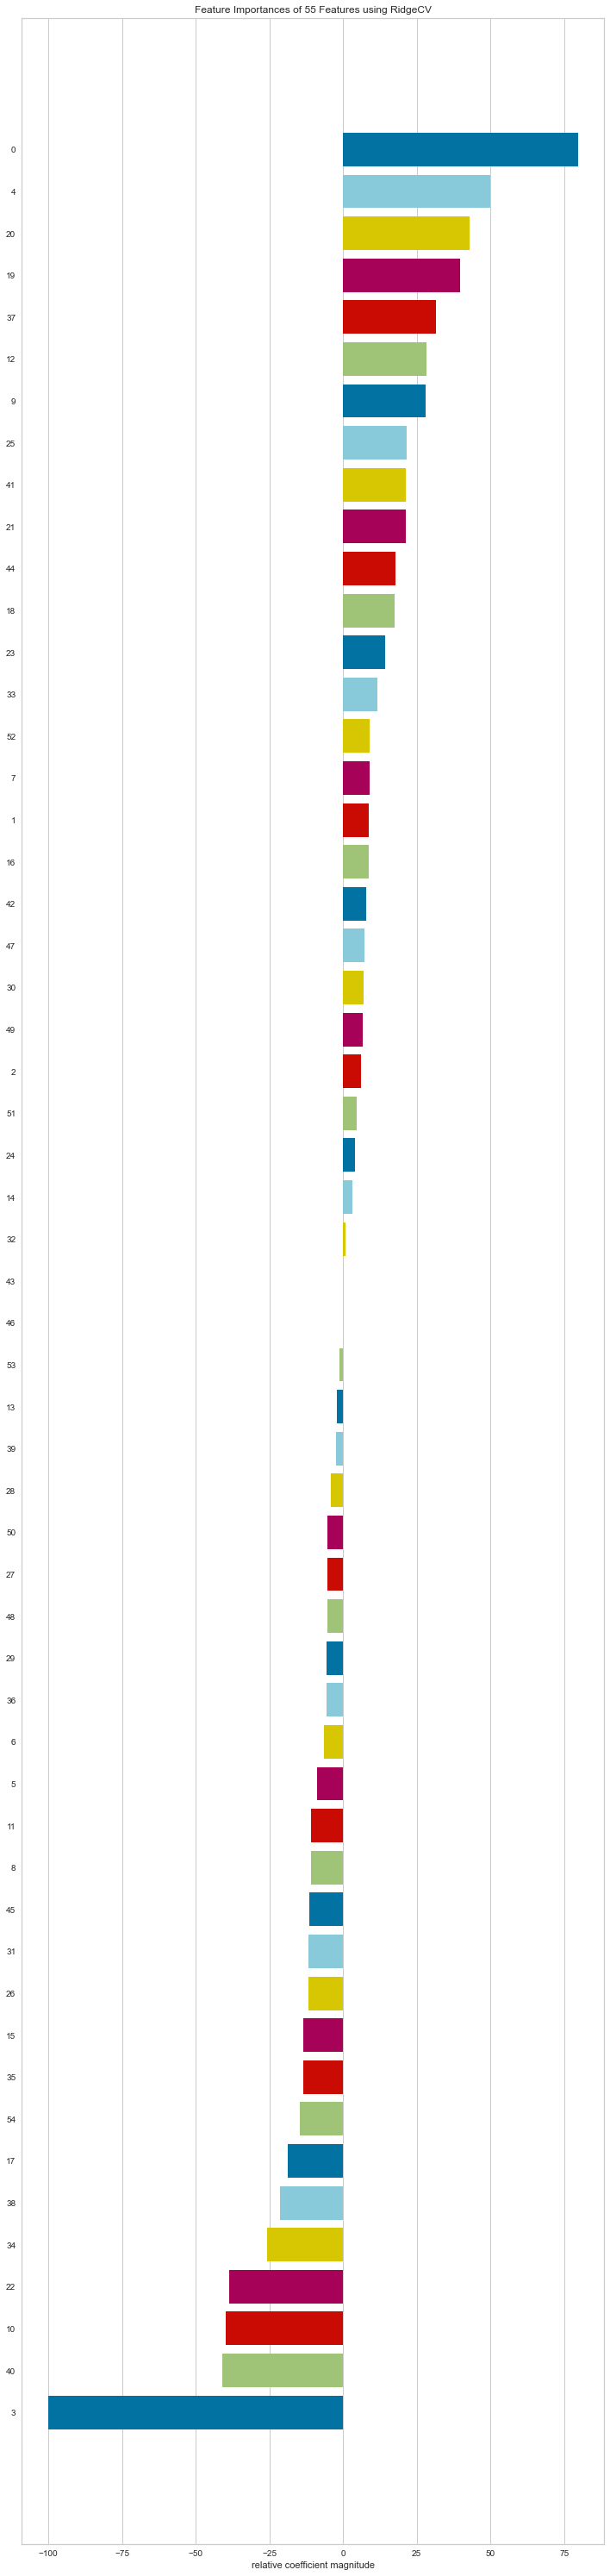

<AxesSubplot:title={'center':'Feature Importances of 55 Features using RidgeCV'}, xlabel='relative coefficient magnitude'>

In [120]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

## Feature importances with Lasso

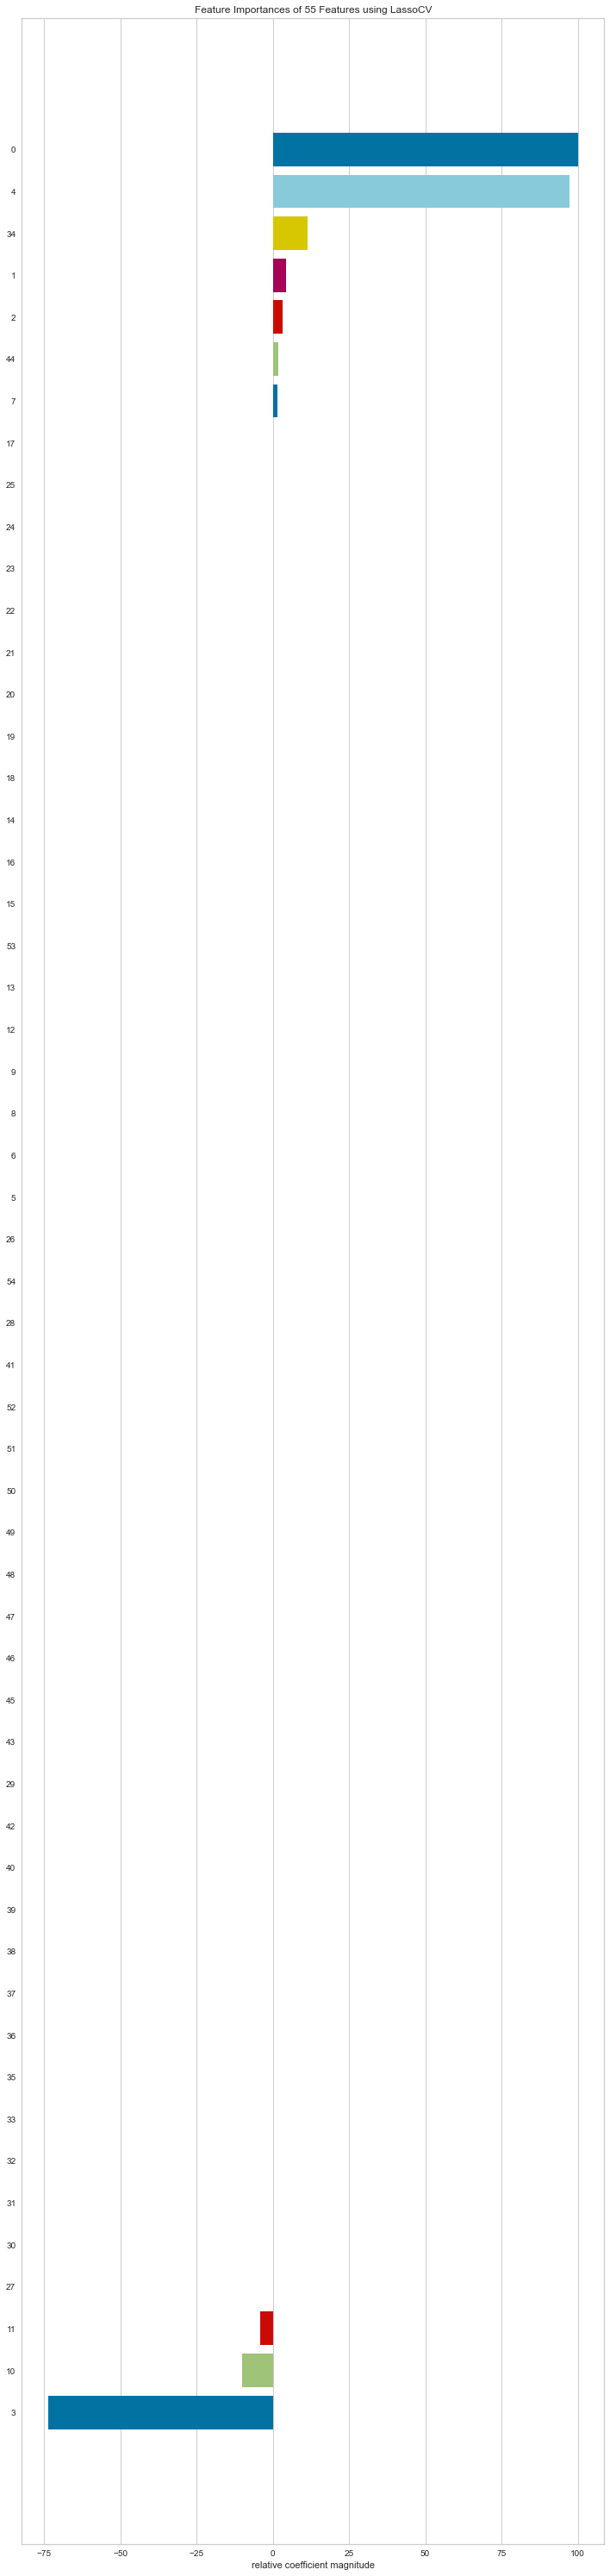

<AxesSubplot:title={'center':'Feature Importances of 55 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [121]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()